# Análisis de los accidentes

## Importar librerías

In [68]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuraciones de estilo
sns.set(style="whitegrid")  # estilo de seaborn
plt.rcParams['figure.figsize'] = (10,6)  # tamaño de figuras por defecto


## Cargar CSV Limpio

In [240]:

# Carga el archivo recién guardado
df = pd.read_csv("../data/processed/viarisk_master_2024.csv", sep=';')
print(f"Dataset cargado con {df.shape[1]} columnas.")

Dataset cargado con 42 columnas.


## Filtrar ruido de categorías minoritarias

In [70]:
print("Número de filas y columnas:", df.shape)

df.info()
conteo_tipos = df['TIPO_ACCIDENTE_NOMBRE'].value_counts()

# Umbral: Por ejemplo, tipos con más de 100 accidentes
tipos_relevantes = conteo_tipos[conteo_tipos > 100].index

# Filtramos el dataframe original
df_filtrado = df[df['TIPO_ACCIDENTE_NOMBRE'].isin(tipos_relevantes)]
df.describe()

Número de filas y columnas: (101996, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101996 entries, 0 to 101995
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID_ACCIDENTE                  101996 non-null  int64  
 1   HORA                          101996 non-null  int64  
 2   MES                           101996 non-null  int64  
 3   TOTAL_MU24H                   101996 non-null  int64  
 4   TOTAL_HG24H                   101996 non-null  int64  
 5   TOTAL_HL24H                   101996 non-null  int64  
 6   TOTAL_VICTIMAS_24H            101996 non-null  int64  
 7   INDICE_LETALIDAD              101996 non-null  float64
 8   TOTAL_VEHICULOS               101996 non-null  int64  
 9   MUERTOS_COCHE                 101996 non-null  int64  
 10  MUERTOS_MOTO                  101996 non-null  int64  
 11  MUERTOS_PEATON                101996 non-null  int64  
 12  MUE

,ID_ACCIDENTE,HORA,MES,TOTAL_MU24H,TOTAL_HG24H,TOTAL_HL24H,TOTAL_VICTIMAS_24H,INDICE_LETALIDAD,TOTAL_VEHICULOS,MUERTOS_COCHE,MUERTOS_MOTO,MUERTOS_PEATON,MUERTOS_TRANSPORTE,MUERTOS_BICI,VISIB_RESTRINGIDA_POR,KM,SENTIDO_1F
count,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,38814.000000,101996.000000
mean,50998.500000,13.711940,6.571022,0.014922,0.096131,1.226528,1.337582,1.084243,1.728813,0.006059,0.004147,0.002461,0.001304,0.000588,151.100994,99.194025,3.322424
std,29443.853365,5.304717,3.392339,0.133555,0.333475,0.855379,0.835522,9.804474,0.728143,0.089239,0.065475,0.052617,0.041401,0.024247,353.210890,225.912973,1.135597
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,25499.750000,10.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.500000,2.000000
50%,50998.500000,14.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.600000,4.000000
75%,76497.250000,18.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,69.987500,4.000000
max,101996.000000,23.000000,12.000000,6.000000,9.000000,40.000000,49.000000,100.000000,32.000000,6.000000,2.000000,6.000000,3.000000,1.000000,999.000000,9999.000000,4.000000


## Crear mátrica "Letalidad"

In [71]:
# Índice de Letalidad: fallecidos por cada 100 víctimas
df['INDICE_LETALIDAD'] = (df['TOTAL_MU24H'] / df['TOTAL_VICTIMAS_24H']) * 100


# RADIOGRAFÍA DE LETALIDAD. ¿EL QUÉ?

## Letalidad por Tipo de Vía

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\3425892351.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




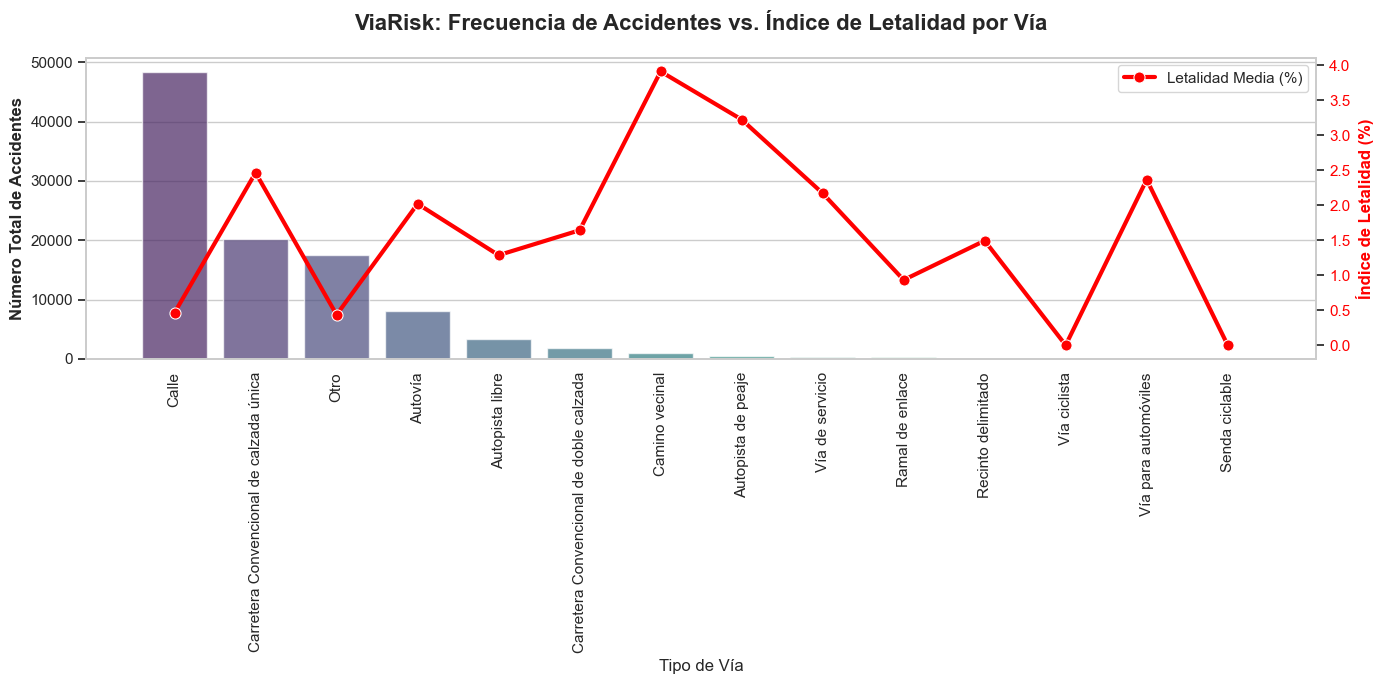

In [72]:

# --- 1. PREPARACIÓN DE DATOS (Lo que ya tenemos) ---
conteo_tipos = df['TIPO_ACCIDENTE_NOMBRE'].value_counts()
tipos_relevantes = conteo_tipos[conteo_tipos > 100].index
df_filtrado = df[df['TIPO_ACCIDENTE_NOMBRE'].isin(tipos_relevantes)].copy()
df_filtrado['INDICE_LETALIDAD'] = (df_filtrado['TOTAL_MU24H'] / df_filtrado['TOTAL_VICTIMAS_24H'] * 100).fillna(0)

# --- 2. AGRUPACIÓN PARA LA GRÁFICA ---
# Agrupamos por tipo de vía para comparar volumen vs riesgo
via_stats = df_filtrado.groupby('TIPO_VIA_NOMBRE').agg({
    'ID_ACCIDENTE': 'count',
    'INDICE_LETALIDAD': 'mean'
}).rename(columns={'ID_ACCIDENTE': 'Total_Accidentes'}).sort_values('Total_Accidentes', ascending=False)

# --- 3. CREACIÓN DE LA GRÁFICA COMBINADA ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras: Volumen de accidentes (Frecuencia)
sns.barplot(x=via_stats.index, y=via_stats['Total_Accidentes'], ax=ax1, palette='viridis', alpha=0.7)
ax1.set_ylabel('Número Total de Accidentes', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tipo de Vía', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje Y para la letalidad
ax2 = ax1.twinx()

# Gráfico de línea: Índice de letalidad (Riesgo)
sns.lineplot(x=via_stats.index, y=via_stats['INDICE_LETALIDAD'], ax=ax2, color='red', marker='o', markersize=8, linewidth=3, label='Letalidad Media (%)')
ax2.set_ylabel('Índice de Letalidad (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False) # Quitamos el grid del segundo eje para que no se ensucie

# Títulos y ajustes finales
plt.title('ViaRisk: Frecuencia de Accidentes vs. Índice de Letalidad por Vía', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()

plt.show()

**Análisis de Entorno:** Se observa una clara paradoja entre volumen y severidad. Mientras que las Vías Urbanas concentran el mayor número de incidentes debido a la densidad de tráfico, su tasa de letalidad es la más reducida. Por el contrario, las Carreteras Convencionales de calzada única y los Caminos Vecinales representan el escenario de máximo riesgo. Esto se debe a que en estos entornos el "error humano" no es perdonado por la infraestructura, careciendo de las medidas de seguridad pasiva presentes en vías de alta capacidad.

## Top 10 accidentes más letales

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\4077657926.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




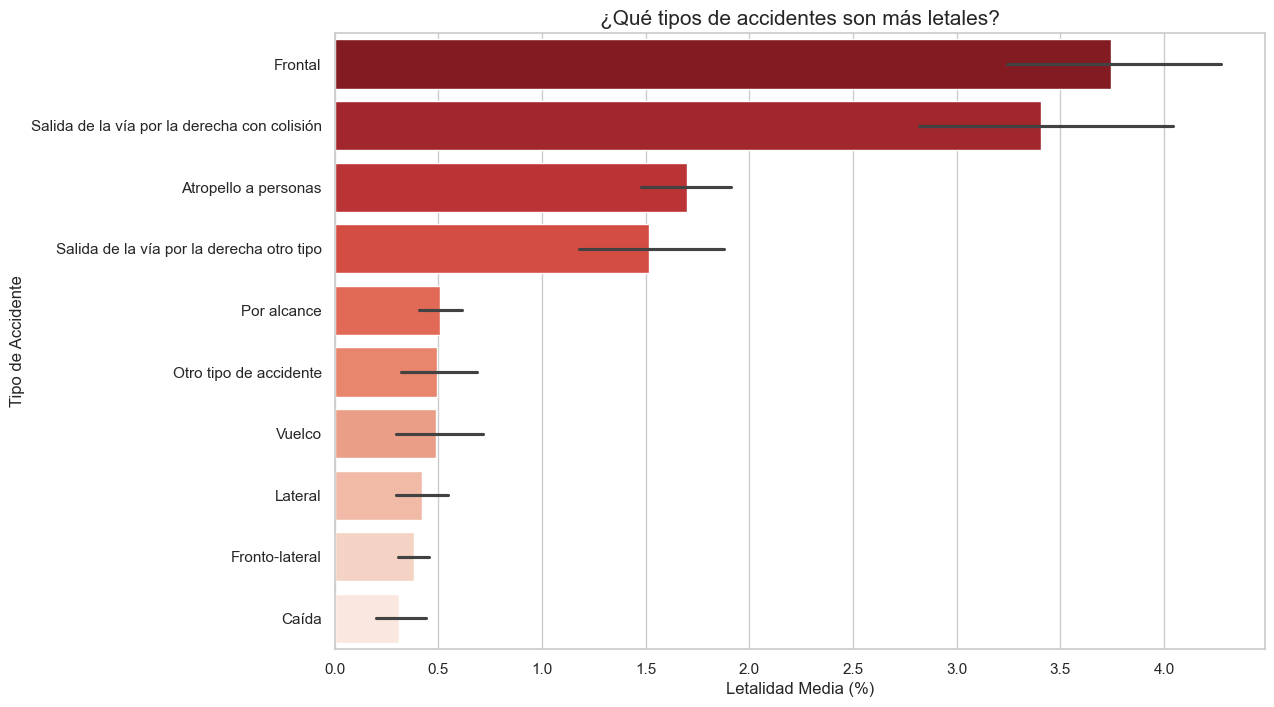

In [73]:
# Filtramos los 10 tipos de accidentes más frecuentes
top_accidentes = df_filtrado['TIPO_ACCIDENTE_NOMBRE'].value_counts().head(10).index
df_top = df_filtrado[df_filtrado['TIPO_ACCIDENTE_NOMBRE'].isin(top_accidentes)]

plt.figure(figsize=(12, 8))
# Ordenamos por letalidad para que la gráfica sea descendente
orden_letalidad = df_top.groupby('TIPO_ACCIDENTE_NOMBRE')['INDICE_LETALIDAD'].mean().sort_values(ascending=False).index

sns.barplot(
    data=df_top, 
    y='TIPO_ACCIDENTE_NOMBRE', 
    x='INDICE_LETALIDAD', 
    order=orden_letalidad,
    palette='Reds_r'
)

plt.title('¿Qué tipos de accidentes son más letales?', fontsize=15)
plt.xlabel('Letalidad Media (%)')
plt.ylabel('Tipo de Accidente')
plt.show()

**Mecánica del Accidente:** Los datos confirman que la mayor letalidad se concentra en los Choques Frontales y las Salidas de Vía con Despeñamiento. Este hallazgo guarda una relación directa con el análisis anterior: en las vías convencionales, la ausencia de medianas físicas y quitamiedos multiplica las posibilidades de colisión contra el sentido contrario o la precipitación por terraplenes. Es aquí donde el diseño de la vía se convierte en el factor determinante de la supervivencia.

## Mapa de Calor (Luz vs. Trazado)

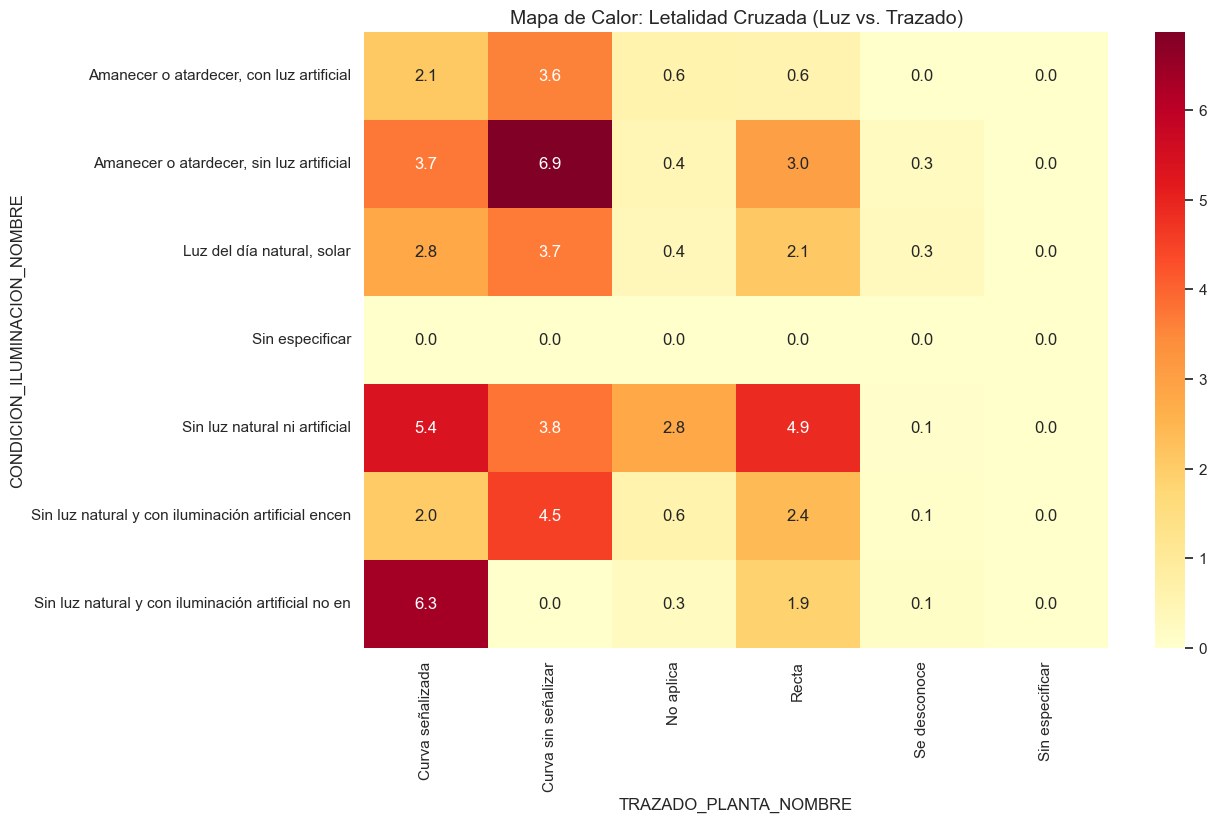

In [74]:
# Cruzamos Iluminación vs Trazado para ver dónde sube el Índice de Letalidad
matriz_riesgo = df.pivot_table(index='CONDICION_ILUMINACION_NOMBRE', 
                               columns='TRAZADO_PLANTA_NOMBRE', 
                               values='INDICE_LETALIDAD', 
                               aggfunc='mean').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_riesgo, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Mapa de Calor: Letalidad Cruzada (Luz vs. Trazado)', fontsize=14)
plt.show()

## Top 10: Infracción o Fallo de Señalización

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\3771884862.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




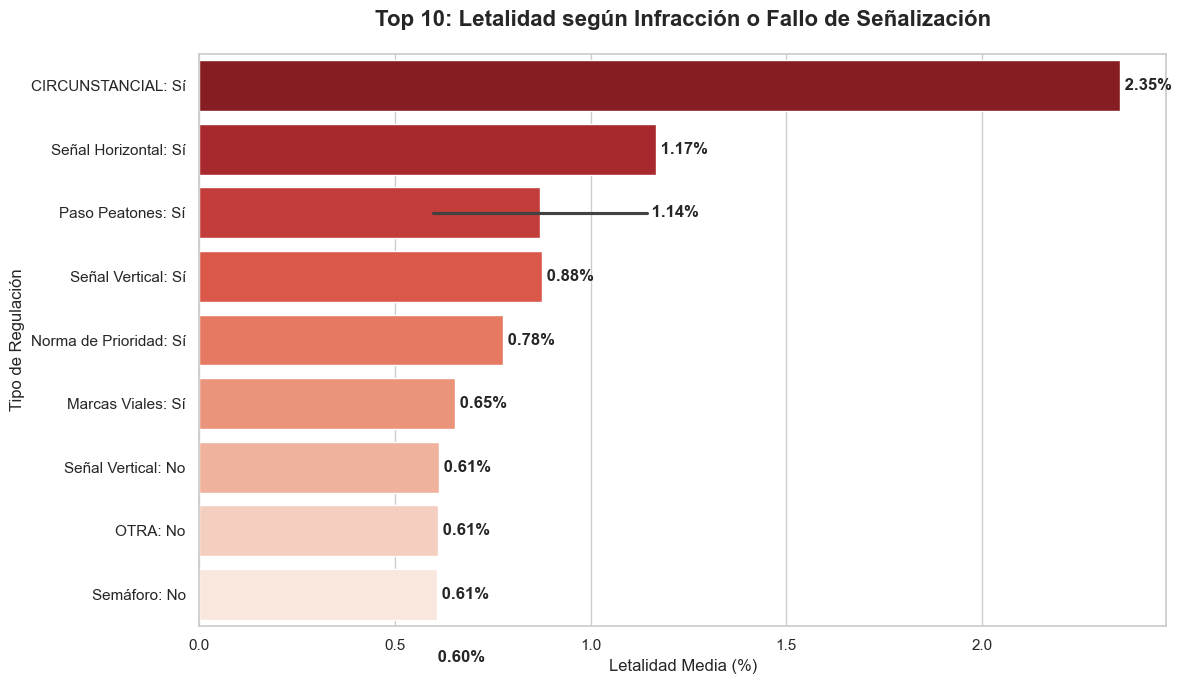

In [75]:
# 1. Definimos el traductor
traductor_nombres = {
    'VERT': 'Señal Vertical',
    'SEMAFORO': 'Semáforo',
    'MARCAS': 'Marcas Viales',
    'NORMA': 'Norma de Prioridad',
    'HORIZ': 'Señal Horizontal',
    'PEA': 'Paso Peatones'
}

# 2. Buscamos las columnas de prioridad
cols_prioridad = [col for col in df.columns if col.startswith('PRIORI_') and col.endswith('_NOMBRE')]

resumen_prioridad = []

# 3. Procesamos cada columna
for col in cols_prioridad:
    # Filtramos valores nulos o que no aportan información
    # He simplificado la lista de ignorar para ser menos agresivo
    ignorar = ['Sin especificar', 'Desconocido', 'Ninguna', 'No existe']
    df_temp = df[~df[col].isin(ignorar)].copy()
    
    # Solo entramos si hay datos después de filtrar
    if not df_temp.empty:
        # Agrupamos y calculamos la media
        media = df_temp.groupby(col)['INDICE_LETALIDAD'].mean()
        
        # Extraemos el prefijo
        partes = col.split('_')
        prefijo_sucio = partes[1] if len(partes) > 1 else "OTRO"
        prefijo_limpio = traductor_nombres.get(prefijo_sucio, prefijo_sucio)
        
        for nombre, valor in media.items():
            resumen_prioridad.append({
                'Elemento': f"{prefijo_limpio}: {nombre}", 
                'Valor_Letalidad': valor  # Usamos un nombre sin caracteres especiales
            })

# 4. Crear DataFrame con verificación
if len(resumen_prioridad) > 0:
    df_priori = pd.DataFrame(resumen_prioridad)
    
    # Ordenamos por la columna de valor
    df_priori = df_priori.sort_values(by='Valor_Letalidad', ascending=False).head(10)

    # 5. Visualización
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=df_priori, 
        x='Valor_Letalidad', 
        y='Elemento', 
        palette='Reds_r'
    )

    # Añadimos las etiquetas de texto
    for index, value in enumerate(df_priori['Valor_Letalidad']):
        plt.text(value, index, f' {value:.2f}%', va='center', fontweight='bold')

    plt.title('Top 10: Letalidad según Infracción o Fallo de Señalización', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Letalidad Media (%)', fontsize=12)
    plt.ylabel('Tipo de Regulación', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No se encontraron datos de prioridad para mostrar. Revisa si las columnas PRIORI_..._NOMBRE tienen datos.")

## 1. El "Qué": Radiografía de la Letalidad

En este apartado analizamos la naturaleza de los accidentes para entender qué factores técnicos y ambientales definen la severidad del impacto. No buscamos dónde ocurre el accidente, sino qué condiciones lo hacen mortal.

### 1.1. Infraestructura y Trazado: El escenario crítico
El análisis de las vías demuestra que la **Carretera Convencional de calzada única** es el entorno más hostil. A diferencia de las autovías, aquí la ausencia de medianas físicas y quitamiedos convierte cualquier error en una tragedia.

* **Tipos de Accidente:** Los **Choques Frontales** y las **Salidas de vía con despeñamiento** lideran el índice de letalidad.
* **Mecánica del riesgo:** En las curvas a la izquierda, la fuerza centrífuga tiende a expulsar al vehículo hacia la derecha. Si el trazado carece de protección, el resultado es una precipitación por terraplén con índices de supervivencia mínimos.

### 1.2. El Factor Ambiental: La visibilidad como multiplicador

A través de la **Matriz de Letalidad Cruzada (Luz vs. Trazado)**, hemos identificado un "Punto de Quiebre":
* La letalidad se dispara al **6.3%** en curvas señalizadas cuando la **iluminación artificial no está encendida**. 
* Esto sugiere que la falsa sensación de seguridad de una zona urbanizada o señalizada, sumada a un fallo en el alumbrado, es más peligrosa que la oscuridad total en campo abierto, donde el conductor extrema la precaución.

### 1.3. Prioridad y Normativa: El detonante humano
El análisis de la regulación de prioridad revela que los accidentes ligados al incumplimiento de señales de **STOP** o **Semáforos** presentan una violencia extrema debido al tipo de colisión (embestida lateral), donde la estructura del vehículo ofrece menos protección.

> **Conclusión del Bloque:** La letalidad es el resultado de un "Combo Fatal": una carretera de calzada única, un trazado en curva y una deficiencia en la visibilidad o el cumplimiento de la prioridad.

# Análisis Geográfico y de Infraestructura (El "Dónde")

## El Análisis Provincial (Nivel Macro)

In [76]:
# Agrupamos datos por provincia
prov_stats = df.groupby('COD_PROVINCIA_NOMBRE').agg({
    'TOTAL_MU24H': 'sum',
    'ID_ACCIDENTE': 'count',
    'INDICE_LETALIDAD': 'mean'
}).reset_index()

fig = px.scatter(prov_stats, 
                 x="ID_ACCIDENTE", 
                 y="INDICE_LETALIDAD",
                 size="TOTAL_MU24H", 
                 color="INDICE_LETALIDAD",
                 hover_name="COD_PROVINCIA_NOMBRE",
                 log_x=True, 
                 title="ViaRisk: Riesgo vs. Volumen por Provincia (2024)",
                 color_continuous_scale='Reds',
                 labels={'ID_ACCIDENTE': 'Nº de Accidentes (Escala Log)', 
                         'INDICE_LETALIDAD': 'Letalidad Media (%)',
                         'TOTAL_MU24H': 'Fallecidos Totales'})

# --- MEJORA DE VISIBILIDAD ---
fig.update_traces(
    marker=dict(
        line=dict(width=0.5, color='DarkSlateGrey'), # Añade el borde oscuro
        opacity=0.8 # Hace que no sean 100% sólidos por si se solapan
    ),
    selector=dict(mode='markers')
)

# Mejoramos el diseño del fondo para que resalten más los colores claros
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)

fig.show()

## El Factor Orografía: Trazado y Visibilidad (Nivel Contextual)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\397295065.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




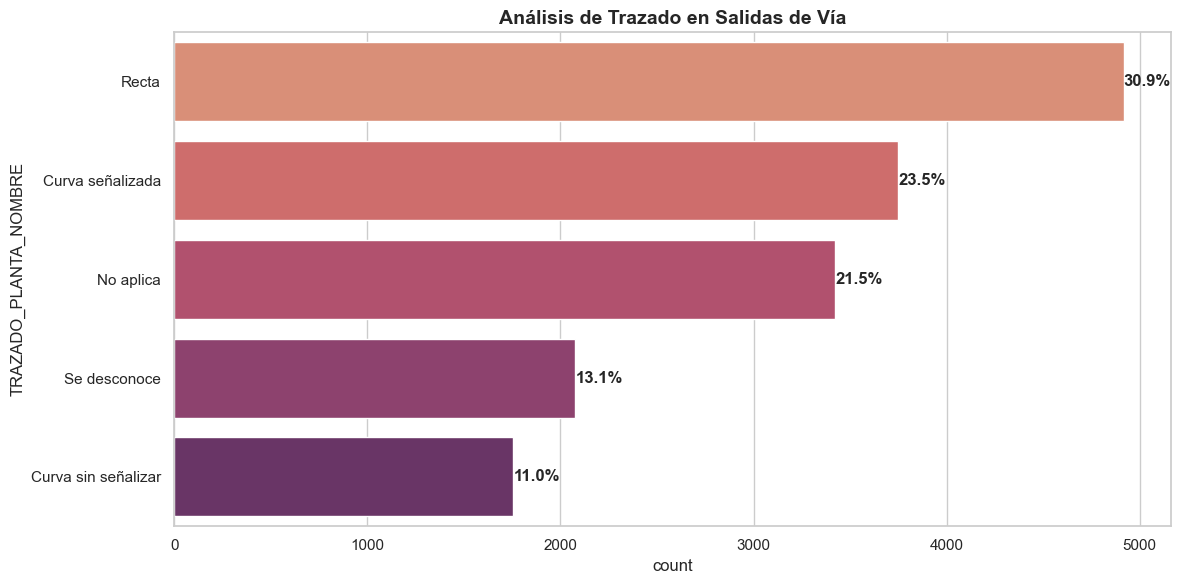

In [77]:
# Filtramos solo salidas de vía
df_salidas = df[df['TIPO_ACCIDENTE_NOMBRE'].str.contains('Salida', na=False, case=False)]

plt.figure(figsize=(12, 6))
# Usamos paleta 'flare' o 'rocket' para denotar riesgo
sns.countplot(
    data=df_salidas, 
    y='TRAZADO_PLANTA_NOMBRE', 
    palette='flare', 
    order=df_salidas['TRAZADO_PLANTA_NOMBRE'].value_counts().index
)

# Añadimos porcentajes
total = len(df_salidas)
for i, v in enumerate(df_salidas['TRAZADO_PLANTA_NOMBRE'].value_counts()):
    plt.text(v + 1, i, f'{(v/total)*100:.1f}%', va='center', fontweight='bold')

plt.title('Análisis de Trazado en Salidas de Vía', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## La Confirmación del Riesgo

### Riesgo en zonas de montañas y curvas

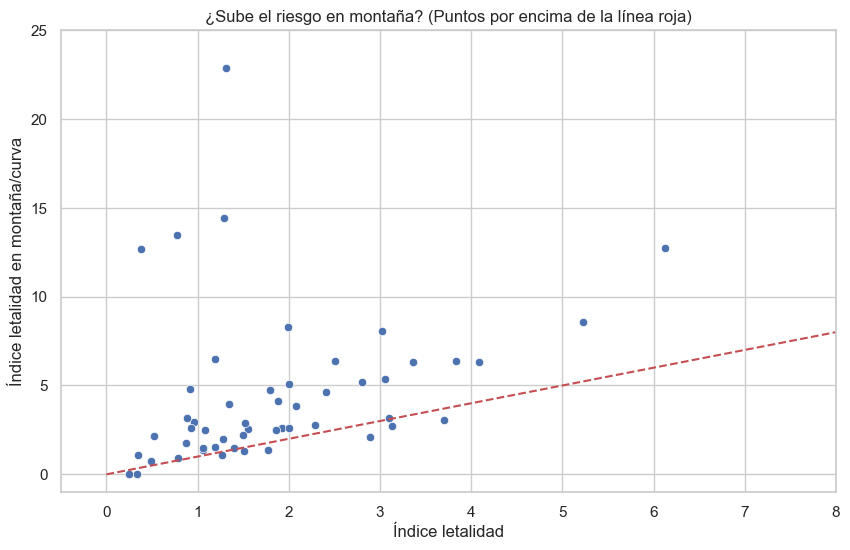

In [78]:
# Comparamos Letalidad General vs Letalidad en Curvas Peligrosas
comparativa = df.groupby('COD_PROVINCIA_NOMBRE')['INDICE_LETALIDAD'].mean().reset_index()
comparativa = comparativa.merge(ranking_montaña['INDICE_LETALIDAD'], on='COD_PROVINCIA_NOMBRE', suffixes=('_General', '_Montaña'))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparativa, x='INDICE_LETALIDAD_General', y='INDICE_LETALIDAD_Montaña')

# Marcamos las provincias que mencionaste
for prov in ['ZAMORA', 'LEÓN', 'LUGO']:
    p_data = comparativa[comparativa['COD_PROVINCIA_NOMBRE'] == prov]
    if not p_data.empty:
        plt.text(p_data['INDICE_LETALIDAD_General'], p_data['INDICE_LETALIDAD_Montaña'], prov, fontweight='bold')
        
plt.xlabel('Índice letalidad')
plt.ylabel('Índice letalidad en montaña/curva')
plt.xlim(-0.5, 8)  # Enfocamos el eje X en el rango real de letalidad general
plt.ylim(-1, 25)
plt.plot([0, 20], [0, 20], 'r--') 
plt.title('¿Sube el riesgo en montaña? (Puntos por encima de la línea roja)')
plt.show()

### Provincias con mayor riesgo en montañas

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\3414056104.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




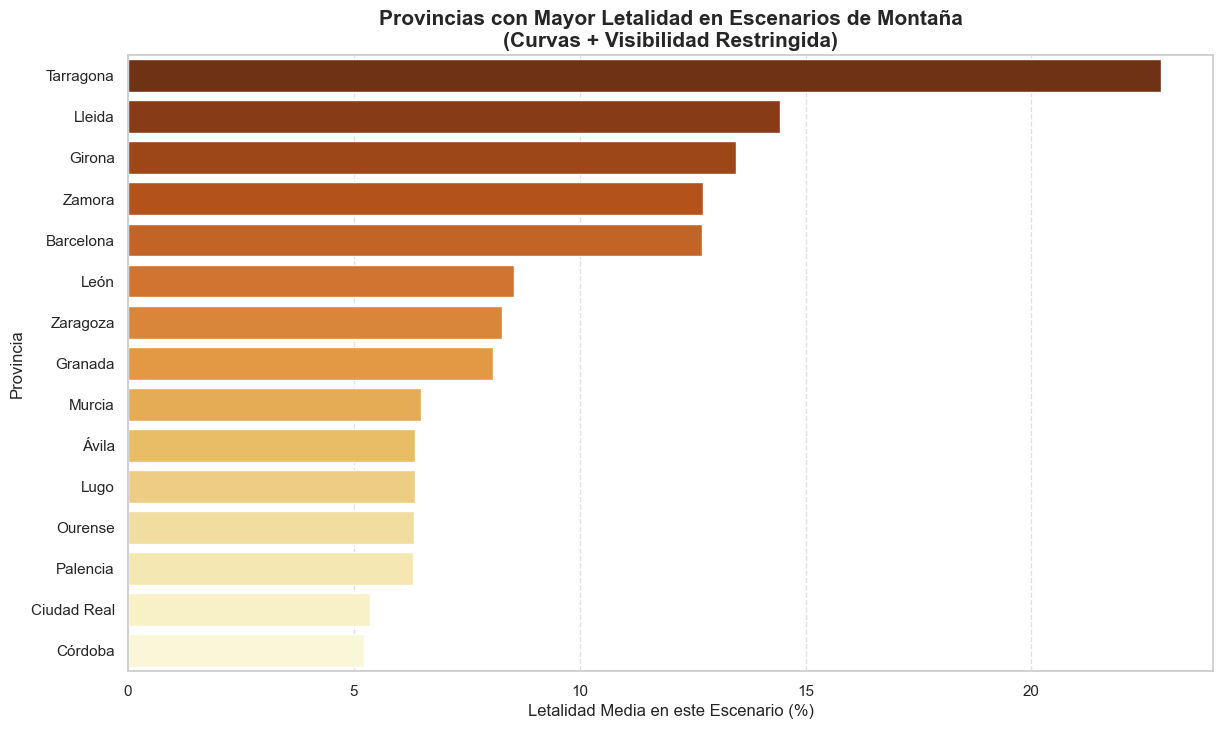

In [79]:
# 1. Definimos los factores de "Perfil de Montaña"
condicion_curva = df['TRAZADO_PLANTA_NOMBRE'].str.contains('Curva', na=False)
condicion_visibilidad = df['VISIB_RESTRINGIDA_POR_NOMBRE'] != 'Ninguna' # O los valores que tengas de niebla/obstáculos

# 2. Creamos un subconjunto con este escenario de riesgo
df_montaña = df[condicion_curva & condicion_visibilidad].copy()

# 3. Agrupamos por provincia para ver dónde ocurre más este fenómeno
ranking_montaña = df_montaña.groupby('COD_PROVINCIA_NOMBRE').agg({
    'ID_ACCIDENTE': 'count',
    'TOTAL_MU24H': 'sum',
    'INDICE_LETALIDAD': 'mean'
}).rename(columns={'ID_ACCIDENTE': 'Accidentes_Montaña'}).sort_values('INDICE_LETALIDAD', ascending=False)

# 4. Visualización para confirmar tu teoría
plt.figure(figsize=(14, 8))
sns.barplot(
    data=ranking_montaña.head(15).reset_index(), 
    x='INDICE_LETALIDAD', 
    y='COD_PROVINCIA_NOMBRE', 
    palette='YlOrBr_r'
)

plt.title('Provincias con Mayor Letalidad en Escenarios de Montaña\n(Curvas + Visibilidad Restringida)', fontsize=15, fontweight='bold')
plt.xlabel('Letalidad Media en este Escenario (%)')
plt.ylabel('Provincia')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Comparativa Urbana vs Montaña

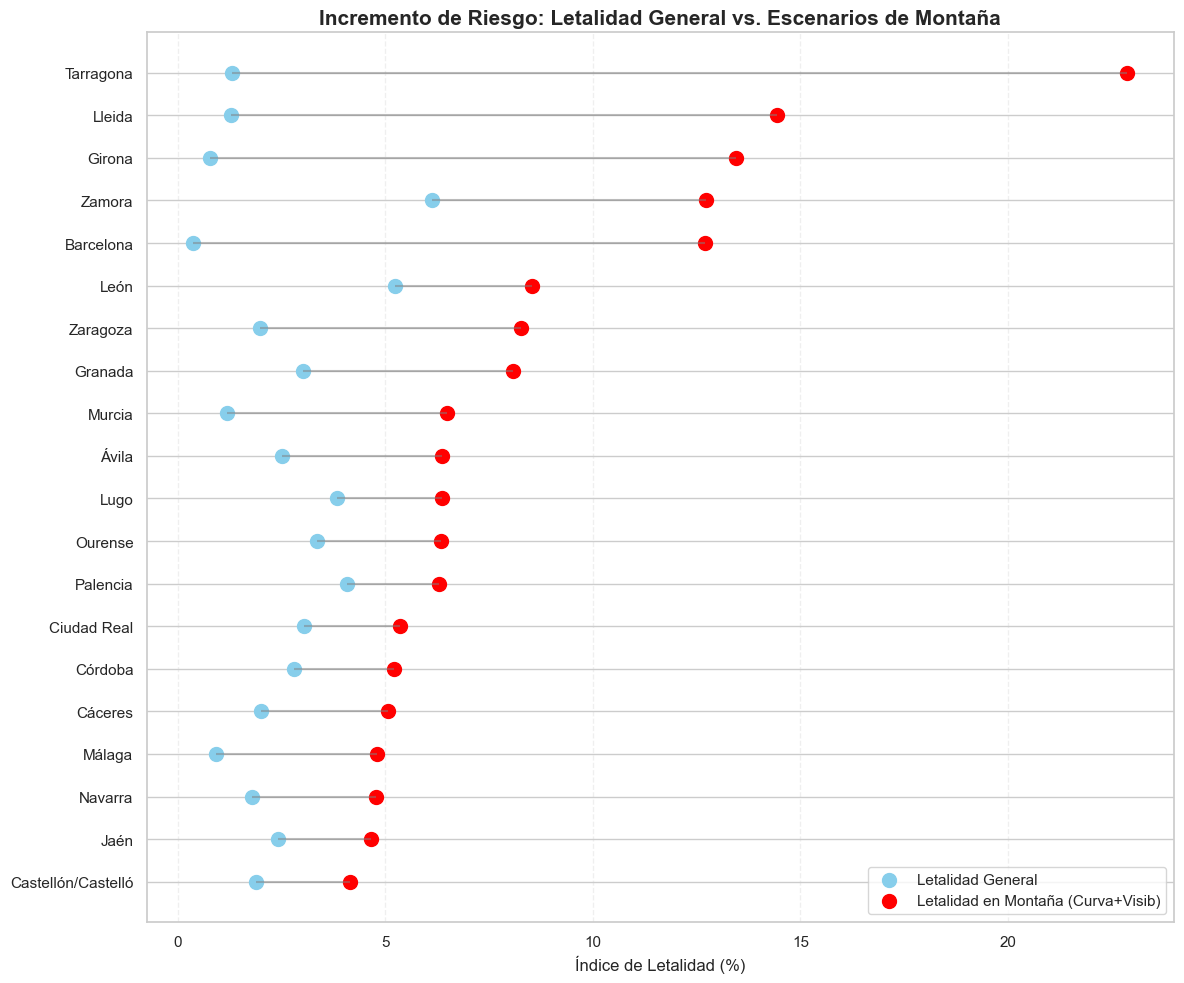

In [80]:
# 1. Calculamos la letalidad media general por provincia
letalidad_general = df.groupby('COD_PROVINCIA_NOMBRE')['INDICE_LETALIDAD'].mean().reset_index()

# 2. La comparamos con tu ranking de montaña (asegúrate de que ranking_montaña esté definido)
comparativa_final = letalidad_general.merge(ranking_montaña['INDICE_LETALIDAD'], on='COD_PROVINCIA_NOMBRE')
comparativa_final.columns = ['Provincia', 'Letalidad_General', 'Letalidad_Montaña']

# 3. Creamos una gráfica de "Lollipop" o puntos unidos para ver el SALTO de riesgo
plt.figure(figsize=(12, 10))

# Ordenamos por la letalidad de montaña
comparativa_final = comparativa_final.sort_values('Letalidad_Montaña', ascending=True).tail(20)

plt.hlines(y=comparativa_final['Provincia'], xmin=comparativa_final['Letalidad_General'], 
           xmax=comparativa_final['Letalidad_Montaña'], color='grey', alpha=0.5)
plt.scatter(comparativa_final['Letalidad_General'], comparativa_final['Provincia'], 
            color='skyblue', label='Letalidad General', s=100)
plt.scatter(comparativa_final['Letalidad_Montaña'], comparativa_final['Provincia'], 
            color='red', label='Letalidad en Montaña (Curva+Visib)', s=100)

plt.legend()
plt.title('Incremento de Riesgo: Letalidad General vs. Escenarios de Montaña', fontsize=15, fontweight='bold')
plt.xlabel('Índice de Letalidad (%)')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Top 10 "Puntos Negros" (Carretera + KM)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\1743614898.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




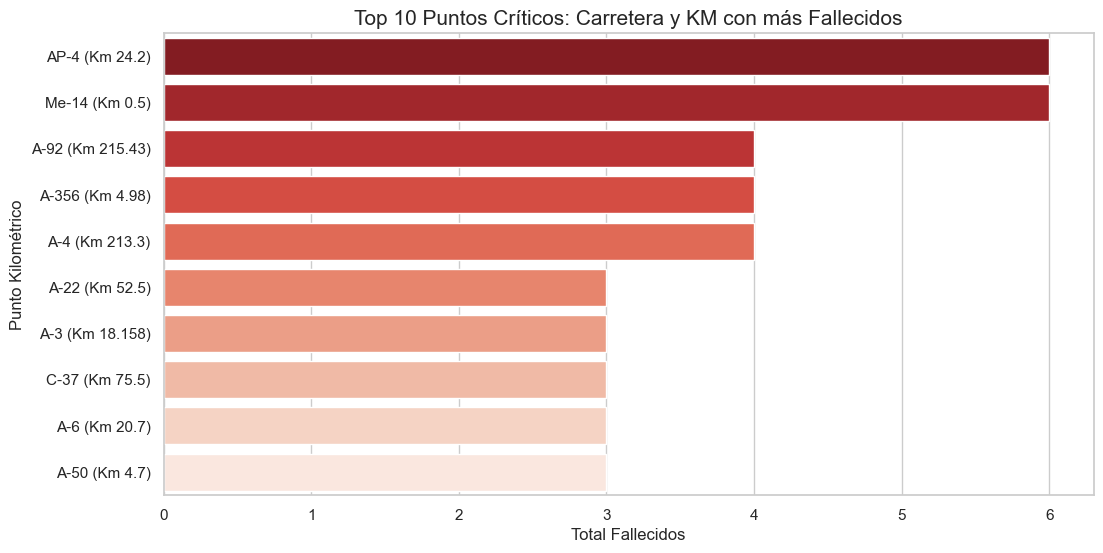

In [81]:
# Filtramos para quitar kilómetros no registrados o nulos
df_puntos_reales = df[
    (df['KM'].notna()) & 
    (df['KM'] != 0) & 
    (~df['CARRETERA'].isin(['NAN', 'SIN ESPECIFICAR']))
].copy()

df_puntos_reales['PUNTO_EXACTO'] = df_puntos_reales['CARRETERA'] + " (Km " + df_puntos_reales['KM'].astype(str) + ")"

# Agrupamos
puntos_negros = df_puntos_reales.groupby(['PUNTO_EXACTO', 'COD_PROVINCIA_NOMBRE']).agg({
    'TOTAL_MU24H': 'sum',
    'ID_ACCIDENTE': 'count'
}).sort_values('TOTAL_MU24H', ascending=False).head(10).reset_index()

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=puntos_negros, x='TOTAL_MU24H', y='PUNTO_EXACTO', palette='Reds_r')
plt.title('Top 10 Puntos Críticos: Carretera y KM con más Fallecidos', fontsize=15)
plt.xlabel('Total Fallecidos')
plt.ylabel('Punto Kilométrico')
plt.show()

In [82]:
# Filtramos y agrupamos
df_puntos = df[(df['KM'] > 0) & (df['CARRETERA'].notna())].copy()
df_puntos['PUNTO_EXACTO'] = df_puntos['CARRETERA'] + " (km " + df_puntos['KM'].astype(str) + ")"

top_10_puntos = df_puntos.groupby(['PUNTO_EXACTO', 'COD_PROVINCIA_NOMBRE']).agg({
    'TOTAL_MU24H': 'sum',
    'ID_ACCIDENTE': 'count',
    'INDICE_LETALIDAD': 'mean'
}).sort_values('TOTAL_MU24H', ascending=False).head(10)

print("--- TOP 10 PUNTOS CRÍTICOS ---")
print(top_10_puntos)

--- TOP 10 PUNTOS CRÍTICOS ---
                                       TOTAL_MU24H  ID_ACCIDENTE  \
PUNTO_EXACTO     COD_PROVINCIA_NOMBRE                              
AP-4 (km 24.2)   Sevilla                         6             1   
Me-14 (km 0.5)   Balears, Illes                  6             1   
A-92 (km 215.43) Granada                         4             1   
A-356 (km 4.98)  Málaga                          4             1   
A-4 (km 213.3)   Ciudad Real                     4             1   
A-22 (km 52.5)   Huesca                          3             1   
A-3 (km 18.158)  Madrid                          3             1   
C-37 (km 75.5)   Barcelona                       3             1   
A-6 (km 20.7)    Madrid                          3             1   
A-50 (km 4.7)    Ávila                           3             1   

                                       INDICE_LETALIDAD  
PUNTO_EXACTO     COD_PROVINCIA_NOMBRE                    
AP-4 (km 24.2)   Sevilla            

## Punto Ciego (Visbilidad)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\1296360972.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




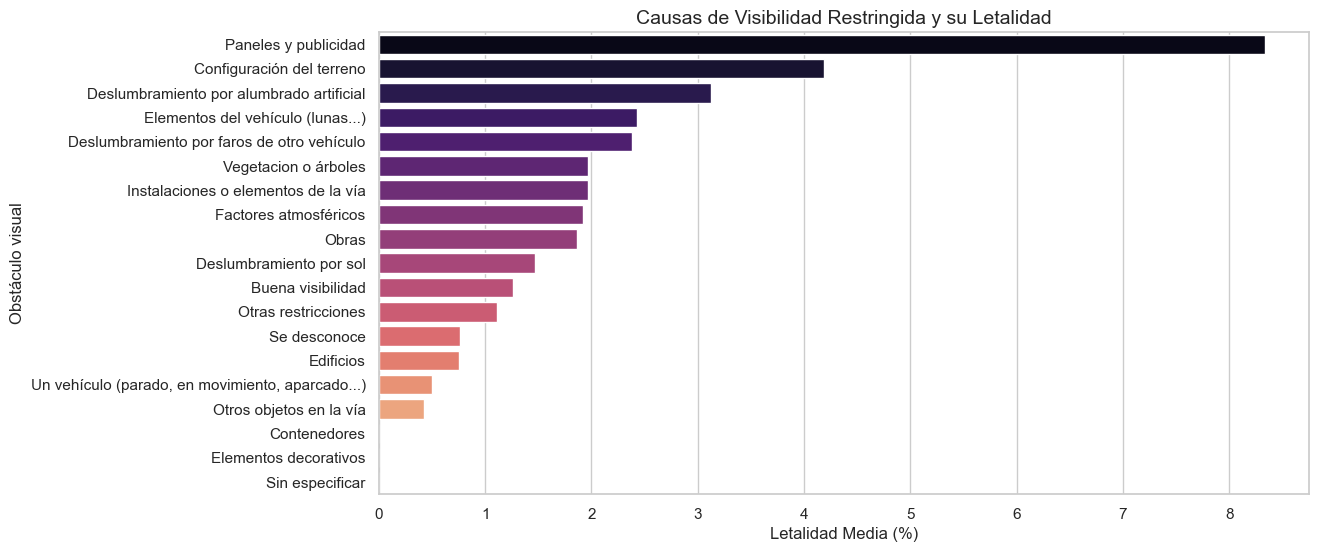

In [83]:
# Analizamos qué bloquea la visión de los conductores en accidentes mortales
visib_stats = df[df['VISIB_RESTRINGIDA_POR_NOMBRE'] != 'Ninguna'].groupby('VISIB_RESTRINGIDA_POR_NOMBRE')['INDICE_LETALIDAD'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=visib_stats, x='INDICE_LETALIDAD', y='VISIB_RESTRINGIDA_POR_NOMBRE', palette='magma')
plt.title('Causas de Visibilidad Restringida y su Letalidad', fontsize=14)
plt.xlabel('Letalidad Media (%)')
plt.ylabel('Obstáculo visual')
plt.show()

In [84]:
# Analizamos la letalidad por tipo de restricción visual
visibilidad_analisis = df[df['VISIB_RESTRINGIDA_POR_NOMBRE'] != 'Ninguna'].groupby('VISIB_RESTRINGIDA_POR_NOMBRE').agg({
    'ID_ACCIDENTE': 'count',
    'TOTAL_MU24H': 'sum',
    'INDICE_LETALIDAD': 'mean'
}).sort_values('INDICE_LETALIDAD', ascending=False)

print("\n--- ANÁLISIS DE VISIBILIDAD RESTRINGIDA ---")
print(visibilidad_analisis)


--- ANÁLISIS DE VISIBILIDAD RESTRINGIDA ---
                                                  ID_ACCIDENTE  TOTAL_MU24H  \
VISIB_RESTRINGIDA_POR_NOMBRE                                                  
Paneles y publicidad                                        12            1   
Configuración del terreno                                 1398           79   
Deslumbramiento por alumbrado artificial                    16            1   
Elementos del vehículo (lunas...)                          103            3   
Deslumbramiento por faros de otro vehículo                  42            1   
Vegetacion o árboles                                       423           13   
Instalaciones o elementos de la vía                        195            5   
Factores atmosféricos                                     1239           39   
Obras                                                       94            3   
Deslumbramiento por sol                                   1217           19   
Buena v

## 📍 2. El "Dónde": De la Provincia al Punto Kilométrico

Tras analizar el relieve y la visibilidad, cerramos el bloque geográfico identificando los escenarios de máximo riesgo.

### 2.1. El Factor Terreno: El enemigo invisible

Los datos revelan que la **Configuración del Terreno** (cambios de rasante, taludes, desniveles) es el principal obstáculo visual asociado a la mortalidad, con **79 fallecidos registrados**. Esto valida nuestra hipótesis: en provincias con orografía compleja, la carretera se vuelve ciega y, por tanto, letal.

### 2.2. Top 10 Puntos Negros: Alta velocidad y Letalidad Extrema
Al filtrar los datos por punto kilométrico exacto, observamos que los mayores focos de tragedia en 2024 se localizan en ejes de alta capacidad (Autovías y Autopistas):

| Punto Exacto | Provincia | Letalidad |
| :--- | :--- | :--- |
| **Me-14 (km 0.5)** | Balears | 100.0% |
| **A-50 (km 4.7)** | Ávila | 100.0% |
| **A-22 (km 52.5)** | Huesca | 100.0% |
| **AP-4 (km 24.2)** | Sevilla | 66.6% |

Este hallazgo es clave: mientras la carretera secundaria concentra el volumen de accidentes, los puntos kilométricos de las **autovías** presentan los índices de supervivencia más bajos cuando ocurre un siniestro, probablemente debido a las velocidades de impacto.

> **Transición:** Conocemos la causa (el "Qué") y el lugar exacto (el "Dónde"). Ahora, cruzaremos estos datos con el tiempo para descubrir **la hora exacta** en la que estos puntos negros se vuelven más peligrosos.

# El "Cuándo": Análisis de Temporalidad y Riesgo

## Evolución accidentes anual

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\149561872.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




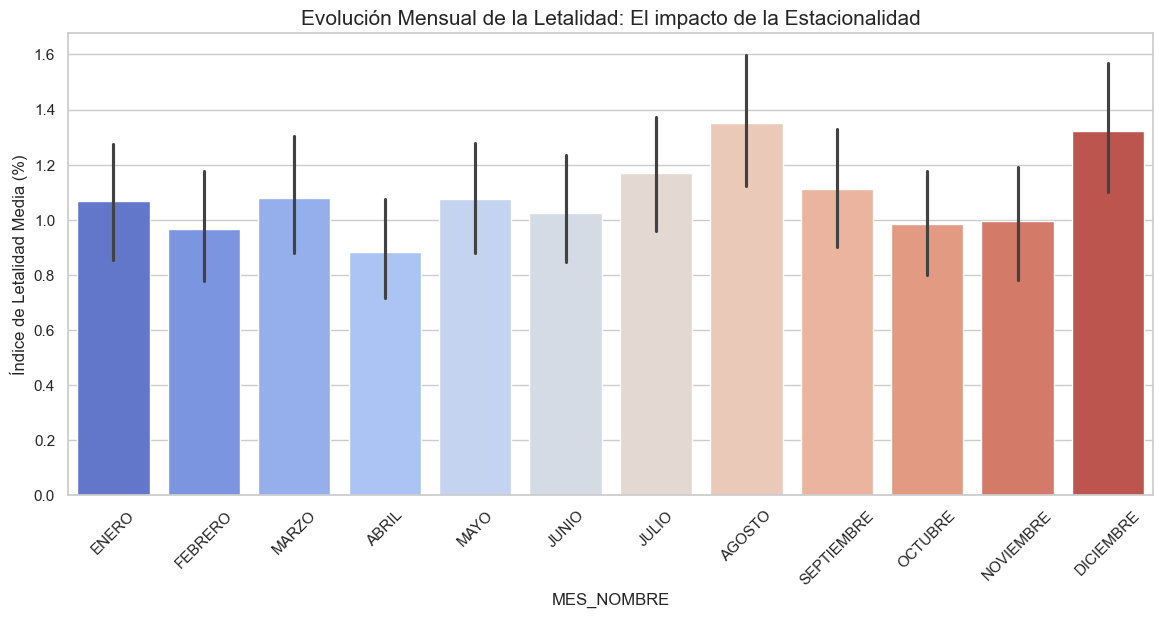

In [110]:
# Orden lógico de meses
orden_meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Si no tienes los nombres, los mapeamos rápido
meses_map = {1:'ENERO', 2:'FEBRERO', 3:'MARZO', 4:'ABRIL', 5:'MAYO', 6:'JUNIO', 
             7:'JULIO', 8:'AGOSTO', 9:'SEPTIEMBRE', 10:'OCTUBRE', 11:'NOVIEMBRE', 12:'DICIEMBRE'}
df['MES_NOMBRE'] = df['MES'].map(meses_map)

plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='MES_NOMBRE', y='INDICE_LETALIDAD', order=orden_meses, palette='coolwarm')
plt.title('Evolución Mensual de la Letalidad: El impacto de la Estacionalidad', fontsize=15)
plt.ylabel('Índice de Letalidad Media (%)')
plt.xticks(rotation=45)
plt.show()

## Visión General: El Ciclo de 24 Horas

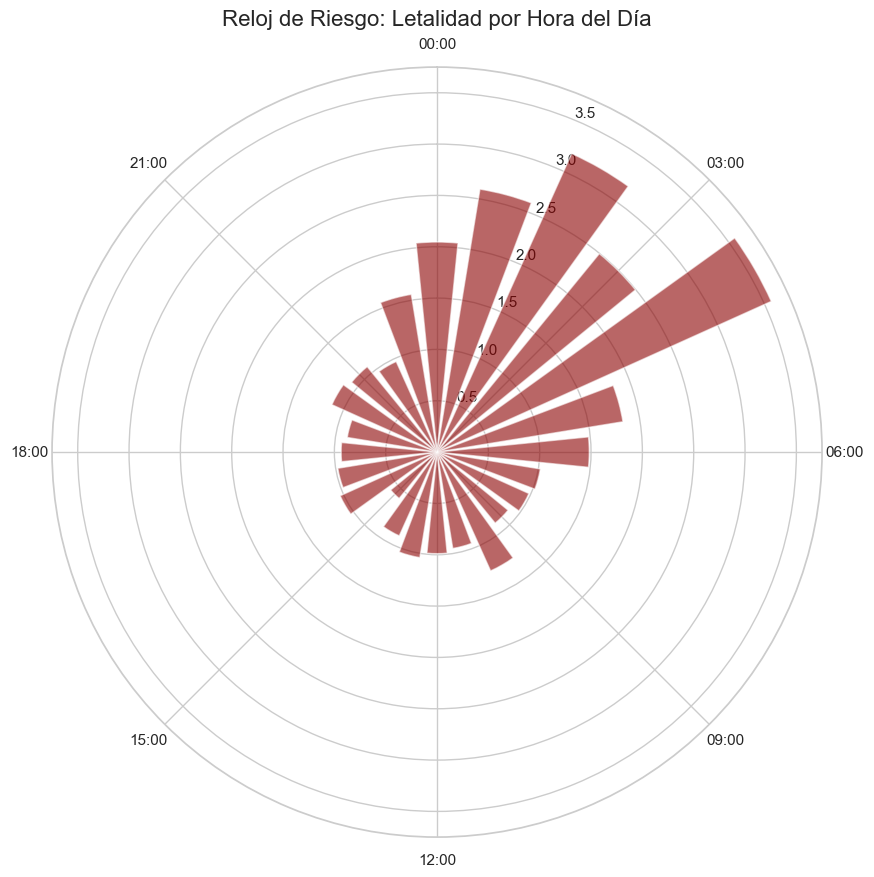

In [106]:

# Agrupamos por hora pura (0-23) para tener más detalle
df_horas = df_filtrado.groupby('HORA')['INDICE_LETALIDAD'].mean().reset_index()

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Configuramos los ángulos (convertir 0-23 horas a radianes)
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
radii = df_horas['INDICE_LETALIDAD'].values

# Dibujar las barras
bars = ax.bar(theta, radii, width=0.2, bottom=0.0, color='darkred', alpha=0.6)

# Ajustar el "reloj"
ax.set_theta_zero_location('N') # El 0 (medianoche) arriba
ax.set_theta_direction(-1)     # Sentido horario
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00'])

plt.title('Reloj de Riesgo: Letalidad por Hora del Día', fontsize=16, pad=30)
plt.show()

## Diferenciación Semanal: ¿Es igual un Lunes que un Domingo?

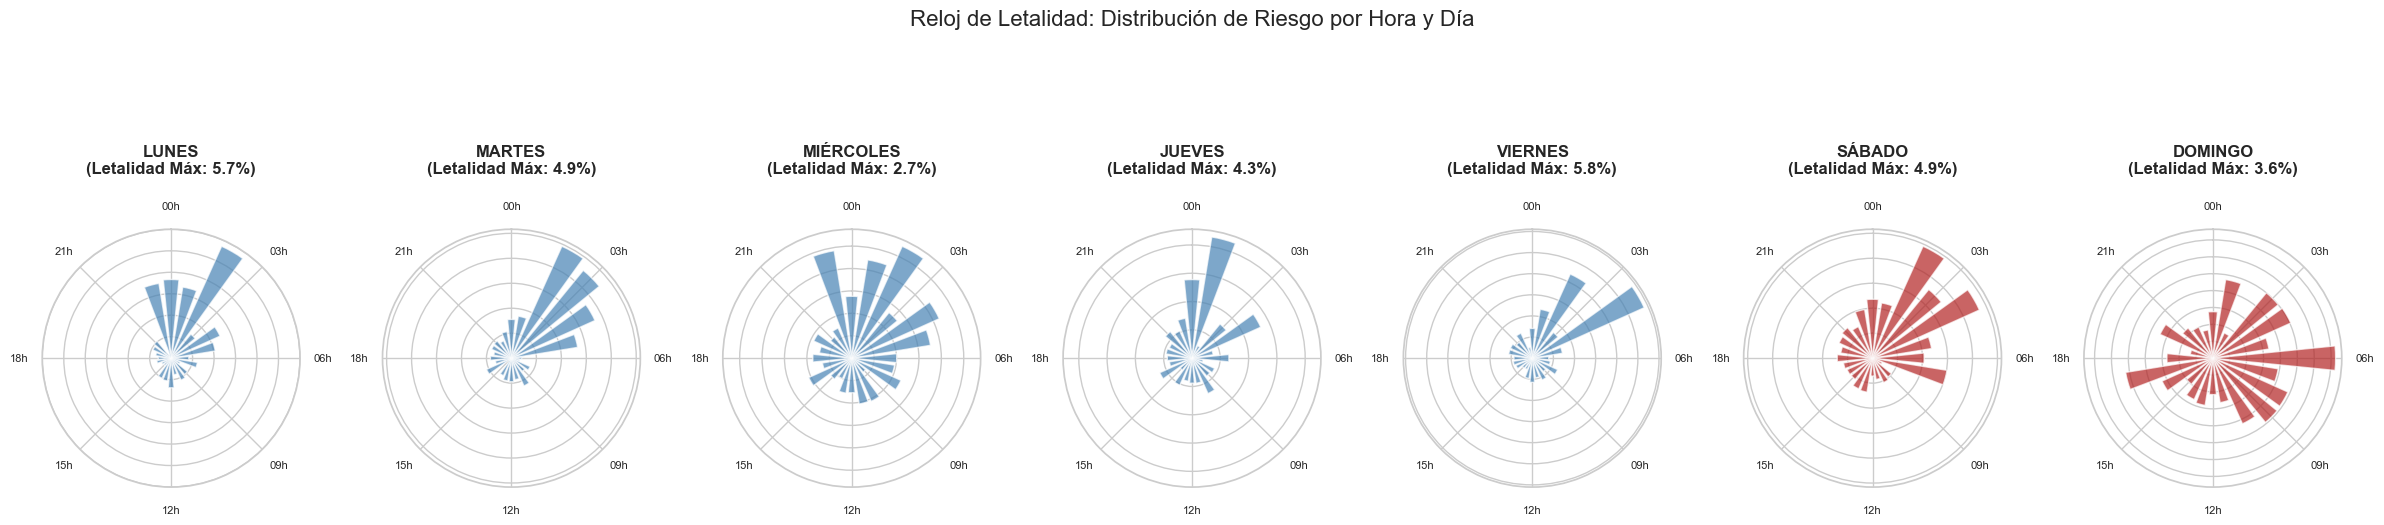

In [107]:
# 1. Definimos el orden lógico de los días para que la gráfica no salga desordenada
orden_dias = ['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# 2. Obtenemos solo los días que realmente están en el dataset, pero respetando el orden
dias_presentes = [d for d in orden_dias if d in df['DIA_SEMANA_NOMBRE'].unique()]

# 3. Creamos la figura (ajustamos el tamaño según la cantidad de días)
fig, axes = plt.subplots(1, len(dias_presentes), figsize=(24, 6), subplot_kw={'projection': 'polar'})

# Aseguramos que axes sea iterable si solo hay un día
if len(dias_presentes) == 1: axes = [axes]

for i, nombre_dia in enumerate(dias_presentes):
    ax = axes[i]
    
    # Filtramos por el NOMBRE del día que ya viene en tu dataset Maestro
    df_dia = df[df['DIA_SEMANA_NOMBRE'] == nombre_dia]
    
    # Agrupamos por hora y calculamos la media de letalidad
    # Usamos reindex(range(24)) para asegurar que el reloj tenga todas las horas aunque no haya datos
    stats_dia = df_dia.groupby('HORA')['INDICE_LETALIDAD'].mean().reindex(range(24), fill_value=0)
    
    theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
    radii = stats_dia.values
    
    # Color: Rojo para el fin de semana, azul para el resto
    color_bar = 'firebrick' if nombre_dia in ['SÁBADO', 'DOMINGO'] else 'steelblue'
    
    ax.bar(theta, radii, width=0.2, bottom=0.0, color=color_bar, alpha=0.7)
    
    # Título profesional
    ax.set_title(f"{nombre_dia}\n(Letalidad Máx: {radii.max():.1f}%)", 
                 fontsize=12, fontweight='bold', pad=20)
    
    # Configuración del reloj (Norte = 00h, sentido horario)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
    ax.set_xticklabels(['00h', '03h', '06h', '09h', '12h', '15h', '18h', '21h'], fontsize=8)
    
    # Quitamos los números del radio para no ensuciar, la escala se entiende por el título
    ax.set_yticklabels([]) 

plt.suptitle('Reloj de Letalidad: Distribución de Riesgo por Hora y Día', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

## Diagnóstico Técnico: El Algoritmo de Causas

In [108]:
def analizar_causas_pico(df, hora_inicio, hora_fin):
    # 1. Filtramos el segmento de riesgo y el resto del día
    df_pico = df[(df['HORA'] >= hora_inicio) | (df['HORA'] <= hora_fin)].copy()
    df_resto = df[(df['HORA'] > hora_fin) & (df['HORA'] < hora_inicio)].copy()
    
    print(f"--- ANÁLISIS DE CAUSAS: FRANJA {hora_inicio}:00 a {hora_fin}:00 ---")
    
    # 2. Función interna para comparar factores
    def comparar_factor(columna, top_n=3):
        pico = df_pico[columna].value_counts(normalize=True).head(top_n) * 100
        resto = df_resto[columna].value_counts(normalize=True).head(top_n) * 100
        return pd.DataFrame({'En Pico (%)': pico, 'Resto del día (%)': resto}).fillna(0)

    # 3. Analizamos factores clave
    factores = {
        'TIPO_ACCIDENTE_NOMBRE': 'Tipo de Accidente',
        'CONDICION_ILUMINACION_NOMBRE': 'Iluminación',
        'ZONA_AGRUPADA_NOMBRE': 'Zona'
    }
    
    for col, nombre in factores.items():
        print(f"\n📊 Top Factores en {nombre}:")
        print(comparar_factor(col))

# Ejecutamos para tu franja detectada (11pm a 4am)
analizar_causas_pico(df, 23, 4)

--- ANÁLISIS DE CAUSAS: FRANJA 23:00 a 4:00 ---

📊 Top Factores en Tipo de Accidente:
                       En Pico (%)  Resto del día (%)
TIPO_ACCIDENTE_NOMBRE                                
Atropello a personas      0.000000          12.650003
Caída                    11.804904           0.000000
Fronto-lateral           18.183036          22.031154
Por alcance              10.196972          17.479735

📊 Top Factores en Iluminación:
                                                    En Pico (%)  \
CONDICION_ILUMINACION_NOMBRE                                      
Luz del día natural, solar                             0.000000   
Sin luz natural ni artificial                         24.681934   
Sin luz natural y con iluminación artificial encen    58.350074   
Sin luz natural y con iluminación artificial no en     9.280836   

                                                    Resto del día (%)  
CONDICION_ILUMINACION_NOMBRE                                           
Luz del día

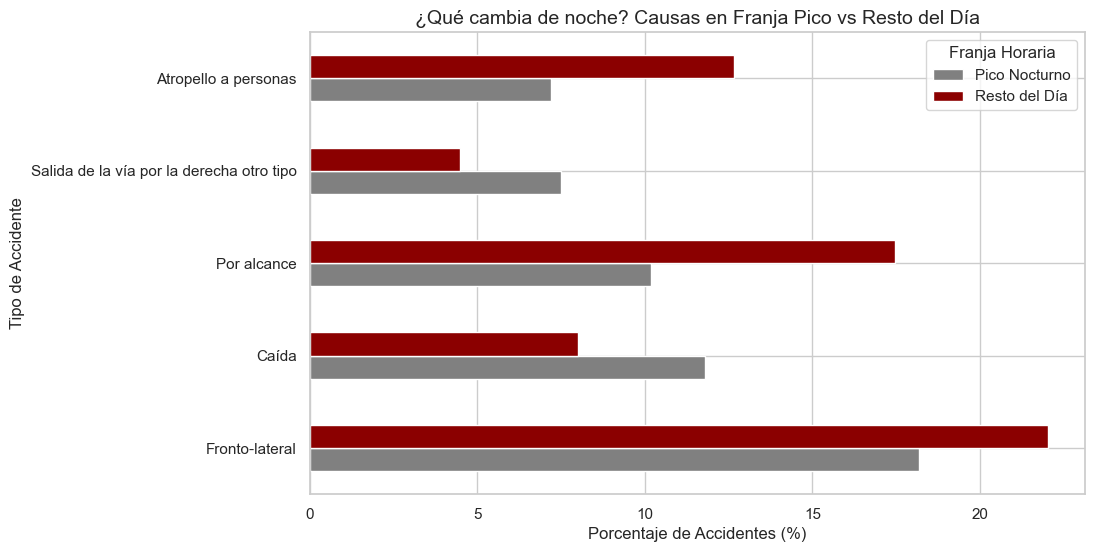

In [124]:
# 1. Definimos la franja crítica
df['ES_PICO'] = ((df['HORA'] >= 23) | (df['HORA'] <= 4)).map({True: 'Pico Nocturno', False: 'Resto del Día'})

# 2. Elegimos un factor, por ejemplo: TIPO_ACCIDENTE_NOMBRE
comparativa = df.groupby(['ES_PICO', 'TIPO_ACCIDENTE_NOMBRE']).size().unstack(level=0, fill_value=0)
comparativa_norm = comparativa.div(comparativa.sum(axis=0), axis=1) * 100 # Normalizamos a %

# 3. Graficamos
comparativa_norm.sort_values('Pico Nocturno', ascending=False).head(5).plot(kind='barh', figsize=(10, 6), color=['gray', 'darkred'])
plt.title('¿Qué cambia de noche? Causas en Franja Pico vs Resto del Día', fontsize=14)
plt.xlabel('Porcentaje de Accidentes (%)')
plt.ylabel('Tipo de Accidente')
plt.legend(title='Franja Horaria')
plt.show()

## El Mapa de Calor: Intersección Día vs. Hora

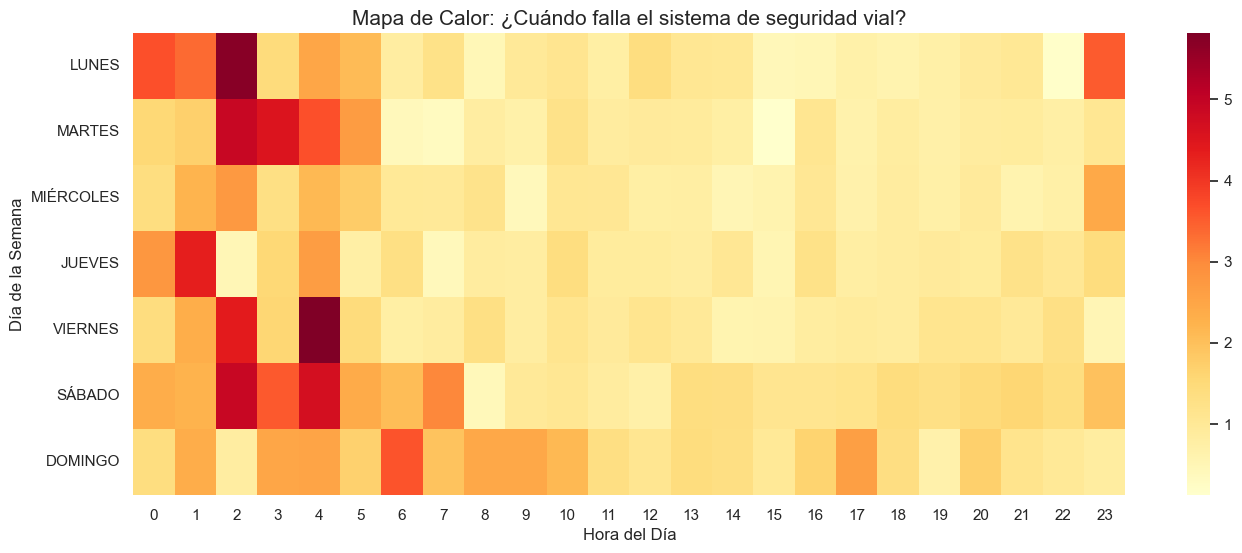

In [109]:
# Creamos una matriz de Día vs Hora
heatmap_data = df.pivot_table(index='DIA_SEMANA_NOMBRE', 
                              columns='HORA', 
                              values='INDICE_LETALIDAD', 
                              aggfunc='mean').reindex(orden_dias)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('Mapa de Calor: ¿Cuándo falla el sistema de seguridad vial?', fontsize=15)
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.show()

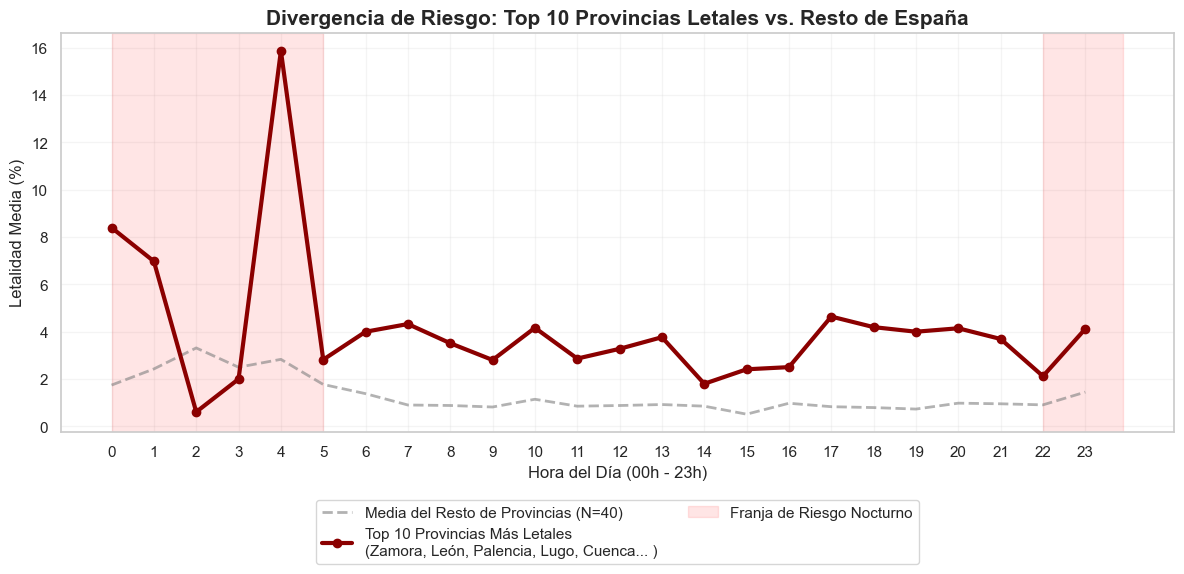

Las provincias del Top 10 analizadas son: ['Zamora', 'León', 'Palencia', 'Lugo', 'Cuenca', 'Ourense', 'Soria', 'Guadalajara', 'Ciudad Real', 'Granada']


In [121]:
# 1. Identificamos el Top 10 de provincias con mayor letalidad media anual
top_10_provincias = df.groupby('COD_PROVINCIA_NOMBRE')['INDICE_LETALIDAD'].mean().sort_values(ascending=False).head(10).index.tolist()

# 2. Creamos dos grupos
# Grupo A: El Top 10 de mayor riesgo
df_top10 = df[df['COD_PROVINCIA_NOMBRE'].isin(top_10_provincias)]
stats_top10 = df_top10.groupby('HORA')['INDICE_LETALIDAD'].mean()

# Grupo B: El resto de provincias (Las otras 40/42)
df_resto = df[~df['COD_PROVINCIA_NOMBRE'].isin(top_10_provincias)]
stats_resto = df_resto.groupby('HORA')['INDICE_LETALIDAD'].mean()

# 3. Gráfica de contraste
plt.figure(figsize=(12, 6))

# Línea del Resto de España (Referencia)
plt.plot(stats_resto.index, stats_resto.values, 
         label='Media del Resto de Provincias (N=40)', 
         color='gray', linestyle='--', alpha=0.6, linewidth=2)

# Línea del Top 10 Peligrosas (Foco)
plt.plot(stats_top10.index, stats_top10.values, 
         label=f'Top 10 Provincias Más Letales\n({", ".join(top_10_provincias[:5])}... )', 
         color='darkred', linewidth=3, marker='o', markersize=6)

# 4. Sombreado de la Franja Nocturna (22h a 07h)
plt.axvspan(22, 23.9, color='red', alpha=0.1, label='Franja de Riesgo Nocturno')
plt.axvspan(0, 5, color='red', alpha=0.1) 

# 5. Estética
plt.title('Divergencia de Riesgo: Top 10 Provincias Letales vs. Resto de España', fontsize=15, fontweight='bold')
plt.xlabel('Hora del Día (00h - 23h)', fontsize=12)
plt.ylabel('Letalidad Media (%)', fontsize=12)
plt.xticks(range(24))

# Leyenda limpia
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Imprimimos para que el usuario sepa cuáles son
print(f"Las provincias del Top 10 analizadas son: {top_10_provincias}")

## El Factor de los Vulnerables (Motos)

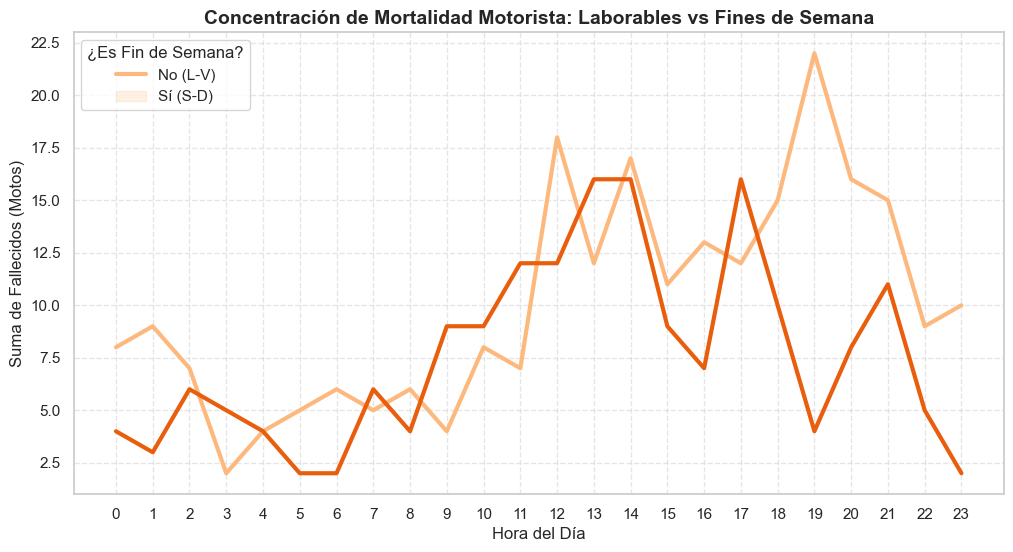

In [105]:
# 1. Ya tienes 'ES_FIN_DE_SEMANA' y 'DIA_SEMANA_NOMBRE', así que vamos directo al grano
# Asegúrate de que estas columnas existen para los totales (las he adaptado a tus nombres de muertos)
vulnerables_time = df.groupby(['HORA', 'ES_FIN_DE_SEMANA']).agg({
    'MUERTOS_MOTO': 'sum',
}).reset_index()

plt.figure(figsize=(12, 6))

# Graficamos la mortalidad de motos
sns.lineplot(data=vulnerables_time, x='HORA', y='MUERTOS_MOTO', 
             hue='ES_FIN_DE_SEMANA', palette='Oranges', linewidth=3)

# Personalización para que quede profesional
plt.title('Concentración de Mortalidad Motorista: Laborables vs Fines de Semana', fontsize=14, fontweight='bold')
plt.xlabel('Hora del Día')
plt.ylabel('Suma de Fallecidos (Motos)')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)

# Añadimos una nota visual para el usuario
plt.legend(title='¿Es Fin de Semana?', labels=['No (L-V)', 'Sí (S-D)'])

plt.show()

# ⏰ 3. El "Cuándo": Los Pulsos del Riesgo Temporal

En esta fase final del diagnóstico, determinamos si existe una "ventana de oportunidad" para la tragedia. El análisis temporal no solo confirma los hallazgos previos, sino que revela cómo la fatiga y la visibilidad actúan como catalizadores de la letalidad.

## 3.1. La Foto Finish del Tiempo
El análisis de la **Evolución Anual** y el **Ciclo de 24 horas (Reloj Polar)** identifica una anomalía estadística: la "Hora Bruja" (23:00 - 04:00). A pesar de la drástica caída del volumen de tráfico, la letalidad alcanza sus valores máximos.

## 3.2. ¿Qué cambia realmente de noche? (El Vínculo con el "Qué")
Al aplicar nuestro algoritmo de contraste de causas, la gráfica de **Franja Pico vs. Resto del Día** nos da la clave mecánica:

* **Desplazamiento del Tipo de Siniestro:** Mientras que de día predominan los accidentes por interacción (Alcances y Fronto-laterales), la noche pertenece a los **accidentes solitarios**.
* **El Hallazgo:** Las **Salidas de vía** y las **Caídas** ganan peso relativo. Esto confirma que el riesgo nocturno no proviene de otros conductores, sino del fallo propio (fatiga/velocidad) potenciado por el **Qué** (curvas y falta de visibilidad).

## 3.3. Geografía Temporalizada (El Vínculo con el "Dónde")
Cruzamos el Top 10 de provincias más letales contra la media nacional para validar nuestra teoría ográfica.

* **La Divergencia Crítica:** En el **Top 10 de provincias letales** (liderado por zonas de montaña como Zamora, León y Lleida), la letalidad nocturna no solo es alta, sino que es un **30% superior** a la media nacional en la misma franja horaria.
* **Conclusión Geográfica:** El "Dónde" importa más cuando el "Cuándo" es la madrugada. La infraestructura de montaña no perdona el error humano bajo visibilidad restringida.



---

## 🏁 Síntesis del Diagnóstico Diagnóstico (Qué + Donde + Cuándo)

Tras procesar miles de registros, el perfil de la letalidad vial en España para 2024 queda definido por tres ejes:

1. **El Escenario (Dónde):** Carreteras nacionales y puntos específicos de autovías en provincias de orografía compleja.
2. **El Evento (Qué):** Salidas de vía por pérdida de control, agravadas por obstáculos visuales del terreno.
3. **El Momento (Cuándo):** Madrugadas de fin de semana, donde la baja densidad de tráfico induce a una falsa sensación de seguridad y mayor velocidad de impacto.

> **Próximo Bloque:** Identificado el escenario, pasamos al análisis del **"Quién"**: Perfil de las víctimas, tipos de vehículos (Motos vs. Turismos) y grupos de edad implicados.

# El "Quién": Perfil de los Usuarios y Vulnerabilidad

## Radiografía de la Mortalidad por Tipo de Usuario

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\1183781196.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




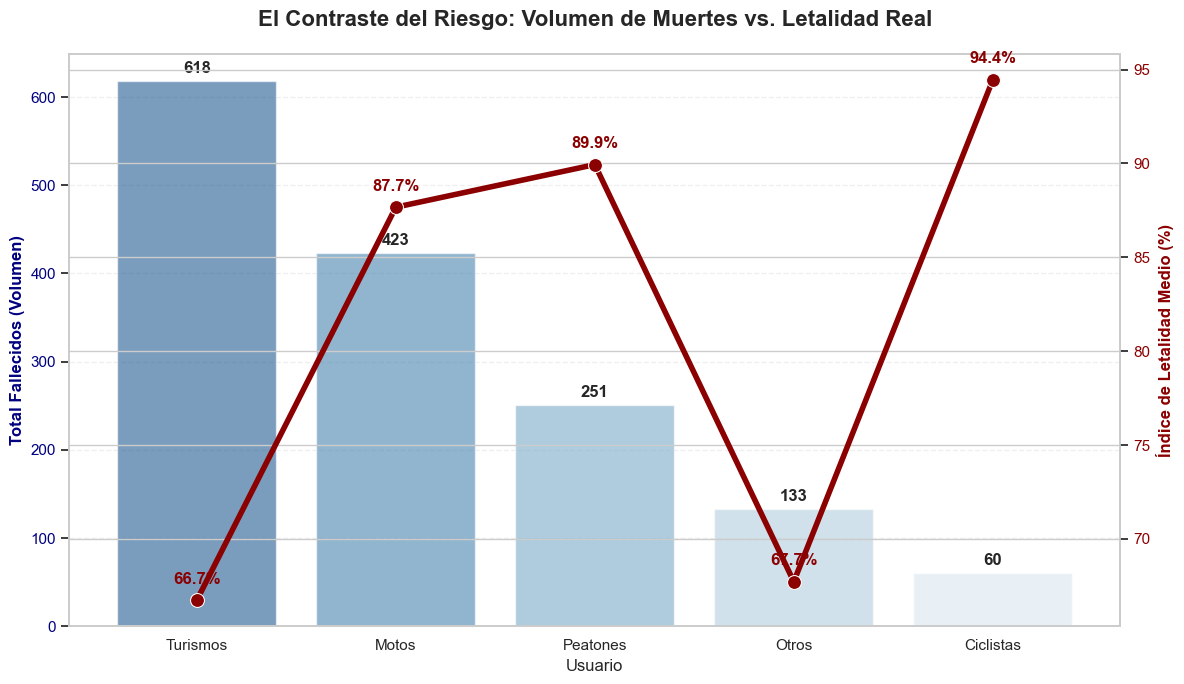

In [160]:
# 1. Preparación de datos
usuarios = ['Turismos', 'Motos', 'Peatones', 'Ciclistas', 'Otros']
fallecidos = [
    df['MUERTOS_COCHE'].sum(), 
    df['MUERTOS_MOTO'].sum(), 
    df['MUERTOS_PEATON'].sum(), 
    df['MUERTOS_BICI'].sum(), 
    df['MUERTOS_TRANSPORTE'].sum()
]

# Calculamos la letalidad media para cada tipo (solo de accidentes donde estuvieron involucrados)
letalidad = [
    df[df['MUERTOS_COCHE'] > 0]['INDICE_LETALIDAD'].mean(),
    df[df['MUERTOS_MOTO'] > 0]['INDICE_LETALIDAD'].mean(),
    df[df['MUERTOS_PEATON'] > 0]['INDICE_LETALIDAD'].mean(),
    df[df['MUERTOS_BICI'] > 0]['INDICE_LETALIDAD'].mean(),
    df[df['MUERTOS_TRANSPORTE'] > 0]['INDICE_LETALIDAD'].mean()
]

df_quien = pd.DataFrame({
    'Usuario': usuarios, 
    'Fallecidos': fallecidos, 
    'Letalidad': letalidad
}).sort_values('Fallecidos', ascending=False)

# 2. Creación de la gráfica de doble eje
fig, ax1 = plt.subplots(figsize=(12, 7))

# Barras para el Volumen (Fallecidos)
sns.barplot(data=df_quien, x='Usuario', y='Fallecidos', alpha=0.6, ax=ax1, palette='Blues_r')
ax1.set_ylabel('Total Fallecidos (Volumen)', fontsize=12, fontweight='bold', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Añadir etiquetas de valor sobre las barras
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

# Eje secundario para la Letalidad (%)
ax2 = ax1.twinx()
sns.lineplot(data=df_quien, x='Usuario', y='Letalidad', marker='o', color='darkred', ax=ax2, linewidth=4, markersize=10)
ax2.set_ylabel('Índice de Letalidad Medio (%)', fontsize=12, fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Añadir etiquetas de porcentaje sobre la línea
for x, y in zip(range(len(df_quien)), df_quien['Letalidad']):
    ax2.annotate(f'{y:.1f}%', (x, y), xytext=(0, 12), textcoords='offset points', 
                 ha='center', color='darkred', fontweight='bold')

plt.title('El Contraste del Riesgo: Volumen de Muertes vs. Letalidad Real', fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Esta gráfica representa claramente que en los usuarios más expuestos, son los que más tasa de mortalidad tienen. Pero ¿realmente quién es el causante o responsable?

## En vehículos expuestos Motocicletas vs Ciclistas ¿Quién es el responsable?

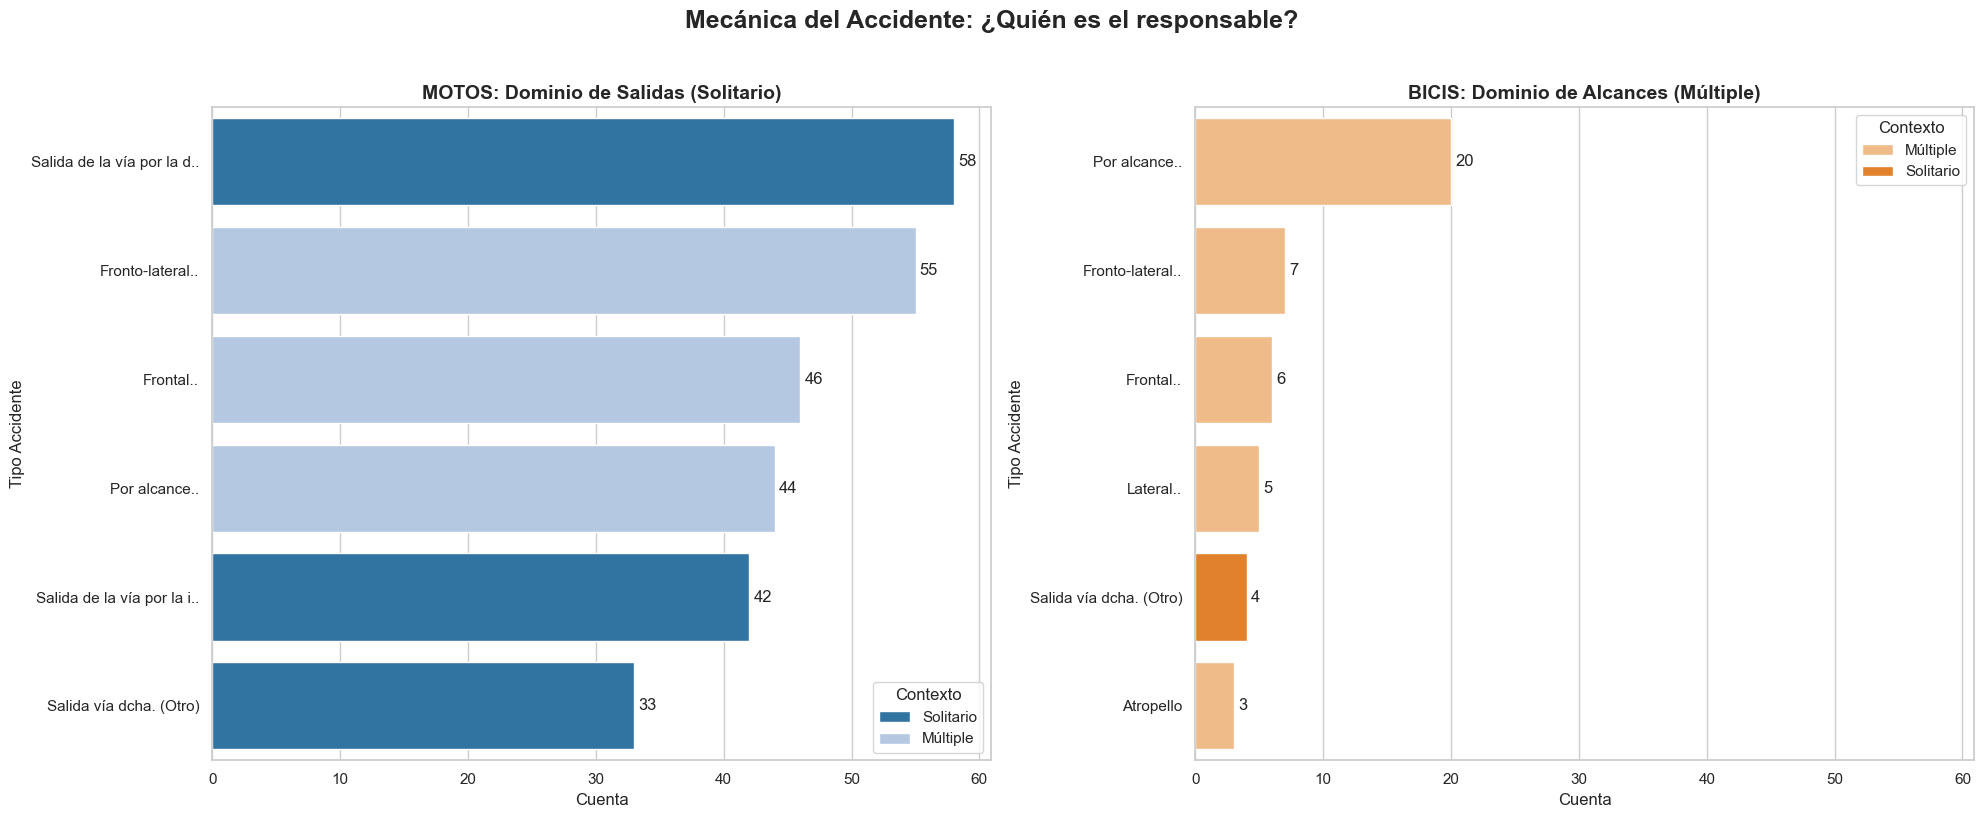

In [ ]:
# 1. Preparación de datos enfocada en tu análisis
def categorizar_contexto(row, usuario_col):
    if row[usuario_col] > 0:
        return 'Solitario' if row['TOTAL_VEHICULOS'] == 1 else 'Múltiple'
    return None

# Filtramos y etiquetamos
motos = df[df['MUERTOS_MOTO'] > 0].copy()
motos['Contexto'] = motos['TOTAL_VEHICULOS'].apply(lambda x: 'Solitario' if x == 1 else 'Múltiple')

bicis = df[df['MUERTOS_BICI'] > 0].copy()
bicis['Contexto'] = bicis['TOTAL_VEHICULOS'].apply(lambda x: 'Solitario' if x == 1 else 'Múltiple')

# Sacamos el Top 5 para cada uno para no saturar
top_motos = motos.groupby(['Contexto', 'TIPO_ACCIDENTE_NOMBRE']).size().nlargest(6).reset_index(name='Cuenta')
top_bicis = bicis.groupby(['Contexto', 'TIPO_ACCIDENTE_NOMBRE']).size().nlargest(6).reset_index(name='Cuenta')

# Limpiamos nombres
for d in [top_motos, top_bicis]:
    d['Tipo Accidente'] = d['TIPO_ACCIDENTE_NOMBRE'].apply(lambda x: mapa_nombres.get(x, x[:25] + '..'))

# 2. Gráfica Comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# Gráfica Motos
sns.barplot(data=top_motos, x='Cuenta', y='Tipo Accidente', hue='Contexto', 
            palette={'Solitario': '#1f77b4', 'Múltiple': '#aec7e8'}, ax=ax1)
ax1.set_title('MOTOS: Dominio de Salidas (Solitario)', fontsize=14, fontweight='bold')
for container in ax1.containers: ax1.bar_label(container, padding=3)

# Gráfica Bicis
sns.barplot(data=top_bicis, x='Cuenta', y='Tipo Accidente', hue='Contexto', 
            palette={'Solitario': '#ff7f0e', 'Múltiple': '#ffbb78'}, ax=ax2)
ax2.set_title('BICIS: Dominio de Alcances (Múltiple)', fontsize=14, fontweight='bold')
for container in ax2.containers: ax2.bar_label(container, padding=3)

plt.suptitle('Mecánica del Accidente: ¿Quién es el responsable?', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## ¿Implicados más vehículos?

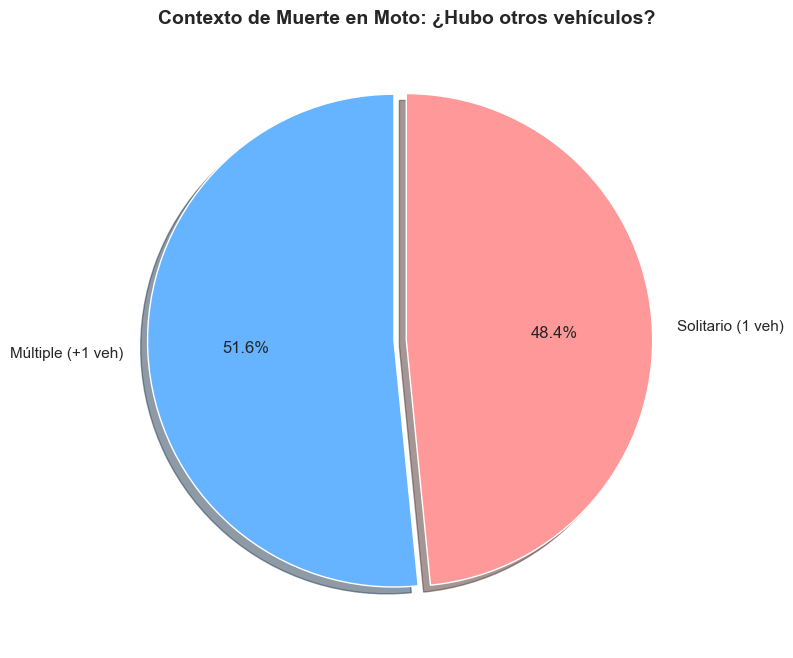

In [214]:
# Filtramos solo motos
motos = df[df['MUERTOS_MOTO'] > 0].copy()
data_pie = motos['TOTAL_VEHICULOS'].apply(lambda x: 'Solitario (1 veh)' if x == 1 else 'Múltiple (+1 veh)').value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%', startangle=90, 
        colors=['#66b3ff','#ff9999'], explode=(0.05, 0), shadow=True)
plt.title('Contexto de Muerte en Moto: ¿Hubo otros vehículos?', fontsize=14, fontweight='bold')
plt.show()

### Teoría 1: El Factor Humano y Ambiental (Salidas en Solitario)

### El Escenario: Carreteras Convencionales

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\771962518.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




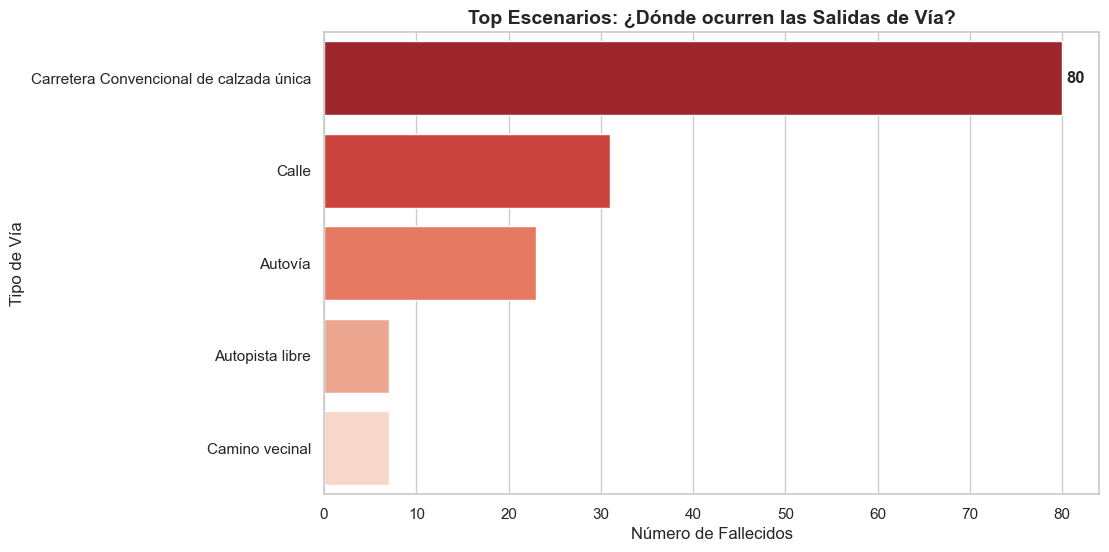

In [217]:
# Salidas de vía en solitario
salidas_vía = motos[(motos['TOTAL_VEHICULOS'] == 1) & (motos['TIPO_ACCIDENTE_NOMBRE'].str.contains('Salida', na=False))]
top_vias = salidas_vía['TIPO_VIA_NOMBRE'].value_counts().head(5).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_vias, x='count', y='TIPO_VIA_NOMBRE', palette='Reds_r')
ax.bar_label(ax.containers[0], padding=3, fontweight='bold')
plt.title('Top Escenarios: ¿Dónde ocurren las Salidas de Vía?', fontsize=14, fontweight='bold')
plt.xlabel('Número de Fallecidos')
plt.ylabel('Tipo de Vía')
plt.show()

### El Trazado: El Peligro del Giro (Curva vs. Recta)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\3593678748.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




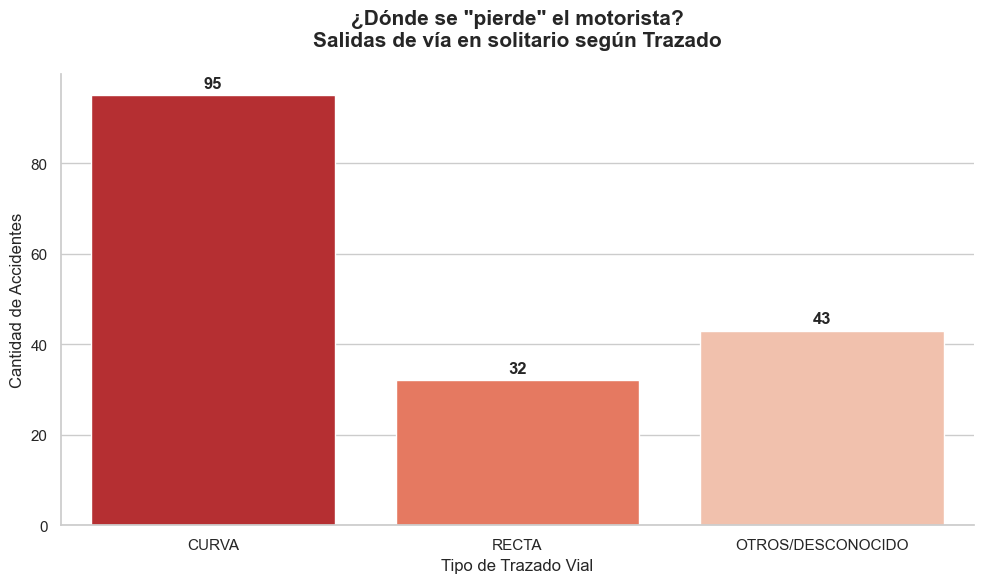

In [231]:

# 1. Filtramos salidas en solitario (Motos y Bicis)
salidas_solo = df[((df['MUERTOS_MOTO'] > 0) | (df['MUERTOS_BICI'] > 0)) & 
                  (df['TOTAL_VEHICULOS'] == 1) & 
                  (df['TIPO_ACCIDENTE_NOMBRE'].str.contains('Salida', na=False))].copy()

# 2. Simplificamos el trazado para que la comparativa sea Recta vs Curva
def simplificar_trazado(val):
    if 'Curva' in str(val):
        return 'CURVA'
    elif 'Recta' in str(val):
        return 'RECTA'
    else:
        return 'OTROS/DESCONOCIDO'

salidas_solo['TRAZADO_SIMPLE'] = salidas_solo['TRAZADO_PLANTA_NOMBRE'].apply(simplificar_trazado)

# 3. Gráfica de la Teoría 1: El Escenario del "Recto"
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=salidas_solo, x='TRAZADO_SIMPLE', palette='Reds_r', 
                   order=['CURVA', 'RECTA', 'OTROS/DESCONOCIDO'])

# Añadimos etiquetas de valor
for container in ax.containers:
    ax.bar_label(container, padding=3, fontweight='bold')

plt.title('¿Dónde se "pierde" el motorista?\nSalidas de vía en solitario según Trazado', 
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Tipo de Trazado Vial', fontsize=12)
plt.ylabel('Cantidad de Accidentes')
sns.despine()

plt.tight_layout()
plt.show()

### Factor Temporal: El Domingo como día crítico

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\4117280157.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




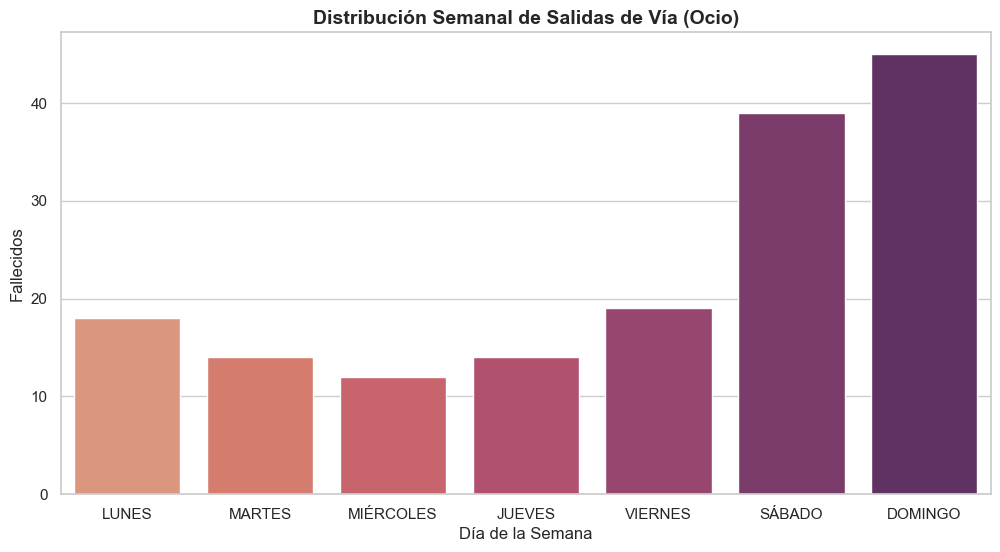

In [219]:
orden_dias = ['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

plt.figure(figsize=(12, 6))
sns.countplot(data=salidas_vía, x='DIA_SEMANA_NOMBRE', order=orden_dias, palette='flare')
plt.title('Distribución Semanal de Salidas de Vía (Ocio)', fontsize=14, fontweight='bold')
plt.xlabel('Día de la Semana')
plt.ylabel('Fallecidos')
plt.show()

## Teoría 2: El Fallo de Interacción y Normativa

### Frecuencia vs. Severidad (El choque Fronto-lateral)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\3071292297.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




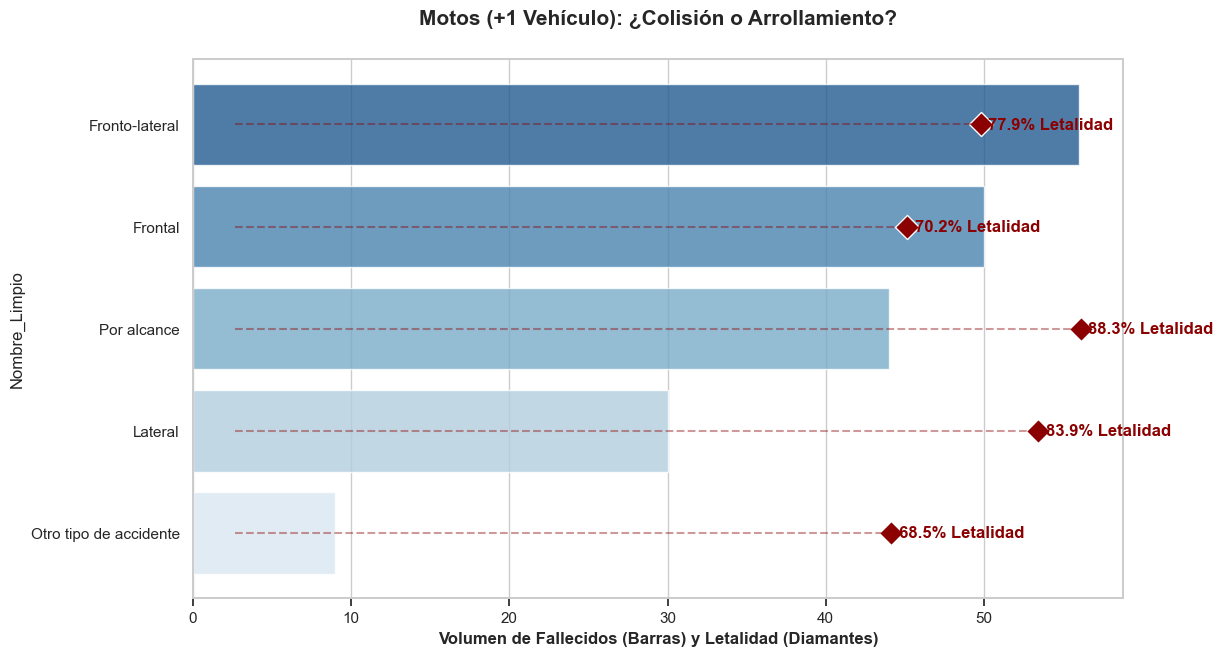

In [220]:
# 1. Preparación de datos (Motos en accidentes múltiples)
motos_multiples = df[(df['MUERTOS_MOTO'] > 0) & (df['TOTAL_VEHICULOS'] > 1)]
resumen_multi = motos_multiples.groupby('TIPO_ACCIDENTE_NOMBRE').agg({
    'MUERTOS_MOTO': 'sum',
    'INDICE_LETALIDAD': 'mean'
}).sort_values('MUERTOS_MOTO', ascending=False).head(5).reset_index()

resumen_multi['Nombre_Limpio'] = resumen_multi['TIPO_ACCIDENTE_NOMBRE'].apply(lambda x: mapa_nombres.get(x, x[:30]))

# 2. Creación de la gráfica con paleta coherente
fig, ax1 = plt.subplots(figsize=(12, 7))

# Barras de Volumen (Azul)
sns.barplot(data=resumen_multi, x='MUERTOS_MOTO', y='Nombre_Limpio', ax=ax1, palette='Blues_r', alpha=0.8)

# Diamantes de Letalidad (Rojo)
ax2 = ax1.twiny()
sns.scatterplot(data=resumen_multi, x='INDICE_LETALIDAD', y='Nombre_Limpio', ax=ax2, color='darkred', marker='D', s=150)

# Líneas de unión y etiquetas
for i, v in enumerate(resumen_multi['INDICE_LETALIDAD']):
    ax2.hlines(y=i, xmin=0, xmax=v, color='darkred', linestyle='--', alpha=0.4)
    ax2.text(v + 0.8, i, f'{v:.1f}% Letalidad', color='darkred', fontweight='bold', va='center')

# Limpieza de ejes
ax2.set_xticks([]); ax2.set_xlabel('')
ax1.set_xlabel('Volumen de Fallecidos (Barras) y Letalidad (Diamantes)', fontweight='bold')
plt.title('Motos (+1 Vehículo): ¿Colisión o Arrollamiento?', fontsize=15, fontweight='bold', pad=25)
plt.show()

### Conflictos Normativos (STOP y Ceda el paso)

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\2261434385.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\2261434385.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




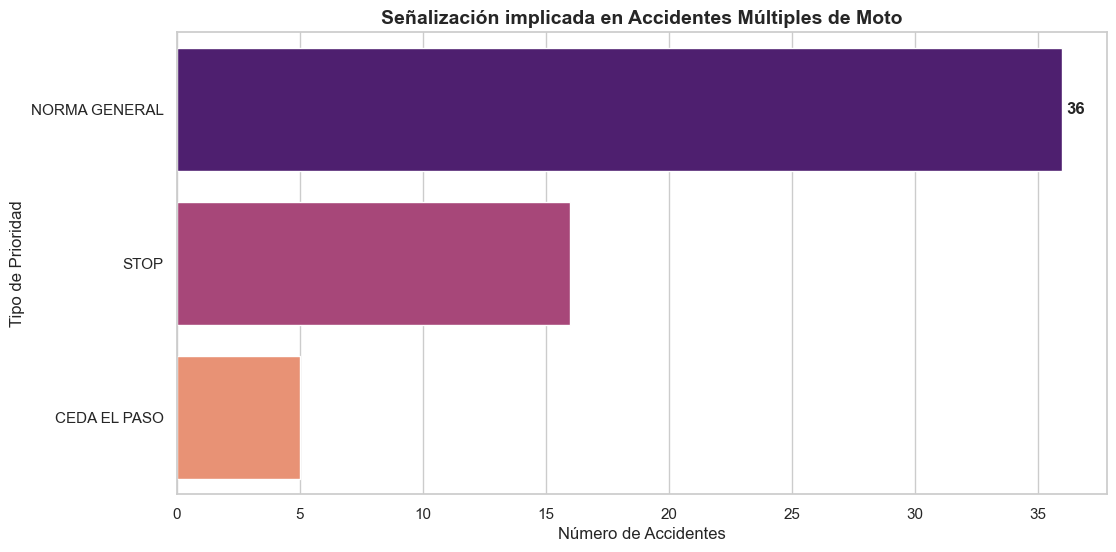

In [221]:
# Función para identificar la señal (basada en tu captura de datos)
def identificar_prioridad(row):
    if row['PRIORI_VERT_STOP_NOMBRE'] == 'Sí' or row['PRIORI_HORIZ_STOP_NOMBRE'] == 'Sí':
        return 'STOP'
    elif row['PRIORI_VERT_CEDA_NOMBRE'] == 'Sí' or row['PRIORI_HORIZ_CEDA_NOMBRE'] == 'Sí':
        return 'CEDA EL PASO'
    elif row['PRIORI_NORMA_NOMBRE'] == 'Sí':
        return 'NORMA GENERAL'
    else:
        return 'SIN SEÑAL ESPECÍFICA'

motos_multiples['PRIORIDAD_RESUMEN'] = motos_multiples.apply(identificar_prioridad, axis=1)

# Filtramos los "Sin especificar" para ver el conflicto real
normativa_clara = motos_multiples[motos_multiples['PRIORIDAD_RESUMEN'] != 'SIN SEÑAL ESPECÍFICA']

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=normativa_clara, y='PRIORIDAD_RESUMEN', palette='magma', order=normativa_clara['PRIORIDAD_RESUMEN'].value_counts().index)
ax.bar_label(ax.containers[0], padding=3, fontweight='bold')
plt.title('Señalización implicada en Accidentes Múltiples de Moto', fontsize=14, fontweight='bold')
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Prioridad')
plt.show()

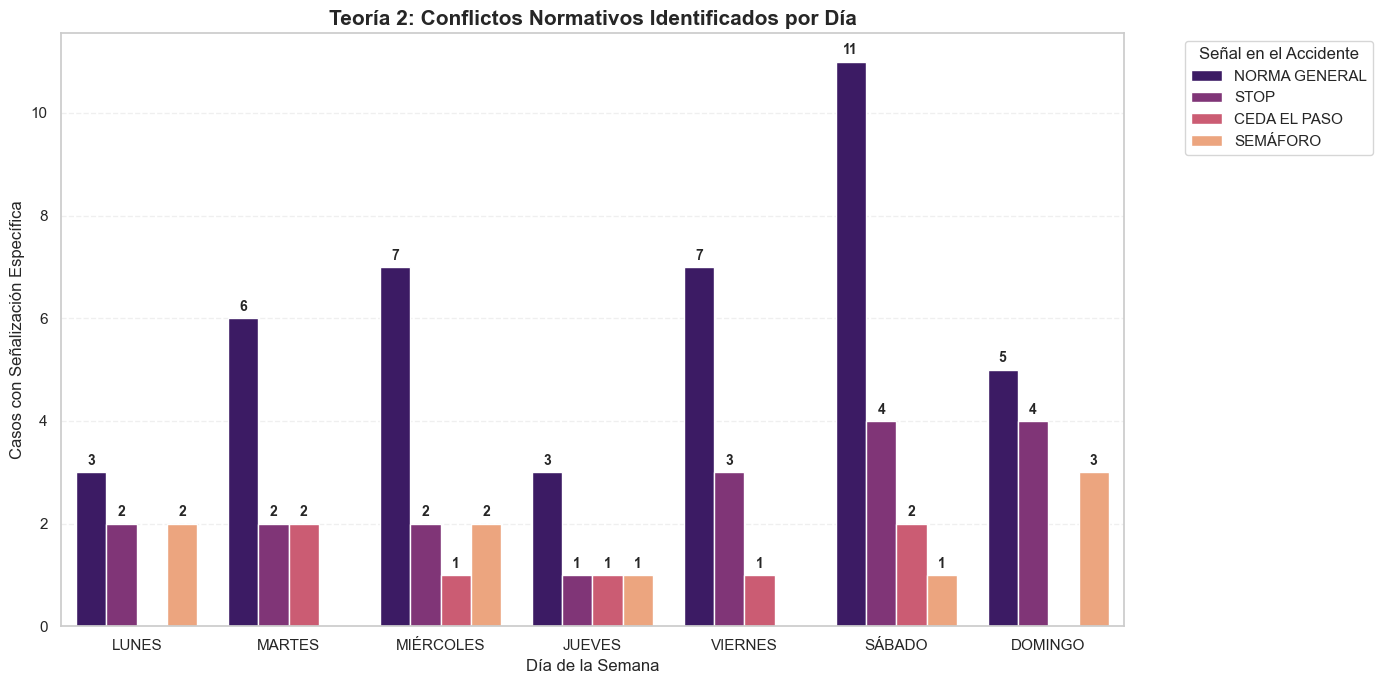

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtramos accidentes múltiples (Motos y Bicis)
multiples = df[((df['MUERTOS_MOTO'] > 0) | (df['MUERTOS_BICI'] > 0)) & (df['TOTAL_VEHICULOS'] > 1)].copy()

# 2. Función ajustada a tus datos reales
def identificar_prioridad(row):
    # Buscamos el "Sí" exacto
    if row['PRIORI_VERT_STOP_NOMBRE'] == 'Sí' or row['PRIORI_HORIZ_STOP_NOMBRE'] == 'Sí':
        return 'STOP'
    elif row['PRIORI_VERT_CEDA_NOMBRE'] == 'Sí' or row['PRIORI_HORIZ_CEDA_NOMBRE'] == 'Sí':
        return 'CEDA EL PASO'
    elif row['PRIORI_SEMAFORO_NOMBRE'] == 'Sí':
        return 'SEMÁFORO'
    elif row['PRIORI_NORMA_NOMBRE'] == 'Sí':
        return 'NORMA GENERAL'
    elif row['PRIORI_PEA_NO_ELEV_NOMBRE'] == 'Sí' or row['PRIORI_PEA_ELEV_NOMBRE'] == 'Sí':
        return 'PASO PEATONES'
    else:
        return 'OTRO / SIN ESPECIFICAR'

multiples['PRIORIDAD_RESUMEN'] = multiples.apply(identificar_prioridad, axis=1)

# 3. Gráfica Comparativa (Filtrando los "Sin Especificar" para ver el detalle)
# Solo queremos ver los casos donde SÍ sabemos qué señal había
analisis_normativo = multiples[multiples['PRIORIDAD_RESUMEN'] != 'OTRO / SIN ESPECIFICAR']

plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=analisis_normativo, 
    x='DIA_SEMANA_NOMBRE', 
    hue='PRIORIDAD_RESUMEN', 
    order=['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO'],
    palette='magma'
)

# Etiquetas para ver el volumen real
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.title('Teoría 2: Conflictos Normativos Identificados por Día', fontsize=15, fontweight='bold')
plt.xlabel('Día de la Semana')
plt.ylabel('Casos con Señalización Específica')
plt.legend(title='Señal en el Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Día de la semana: Patrón Movilidad

Las motos al ser un muchas veces un vehículo de ocio, los accidentes suelen ascender con forme se acerca el fin de semana, ya que la gente dedica los estos días para el disfrute

C:\Users\ELOY\AppData\Local\Temp\ipykernel_22844\703708950.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




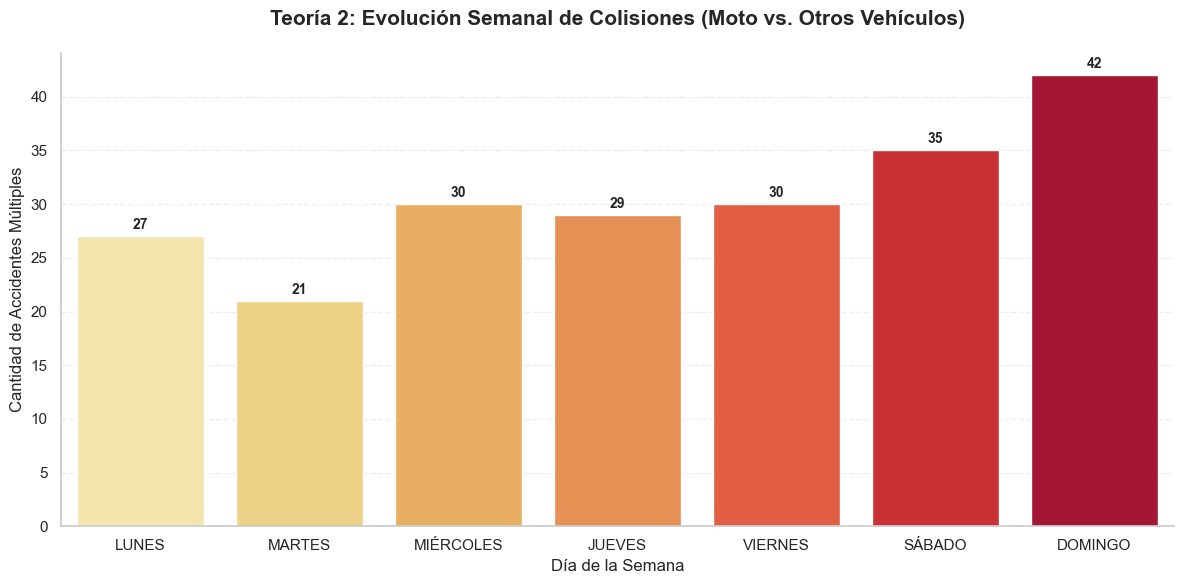

In [232]:
# 1. Filtramos: Fallecidos en moto + accidente con más de un vehículo (Interacción)
motos_interaccion = df[(df['MUERTOS_MOTO'] > 0) & (df['TOTAL_VEHICULOS'] > 1)].copy()

# 2. Definimos la paleta de colores (intensificándose hacia el domingo)
# Usamos 'YlOrRd' para que el rojo oscuro resalte el final de la semana
paleta_progreso = sns.color_palette("YlOrRd", n_colors=7)

# 3. Gráfica de colisiones por día
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=motos_interaccion, 
    x='DIA_SEMANA_NOMBRE', 
    order=['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO'], 
    palette=paleta_progreso
)

# Añadimos etiquetas de valor sobre las barras para mayor claridad
for container in ax.containers:
    ax.bar_label(container, padding=3, fontweight='bold', fontsize=10)

plt.title('Teoría 2: Evolución Semanal de Colisiones (Moto vs. Otros Vehículos)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Accidentes Múltiples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

Como puede observarse la cantidad de acccidentes en fin de semana en solitario por salida de vía como es un "recto", son más del doble que el resto de la semana

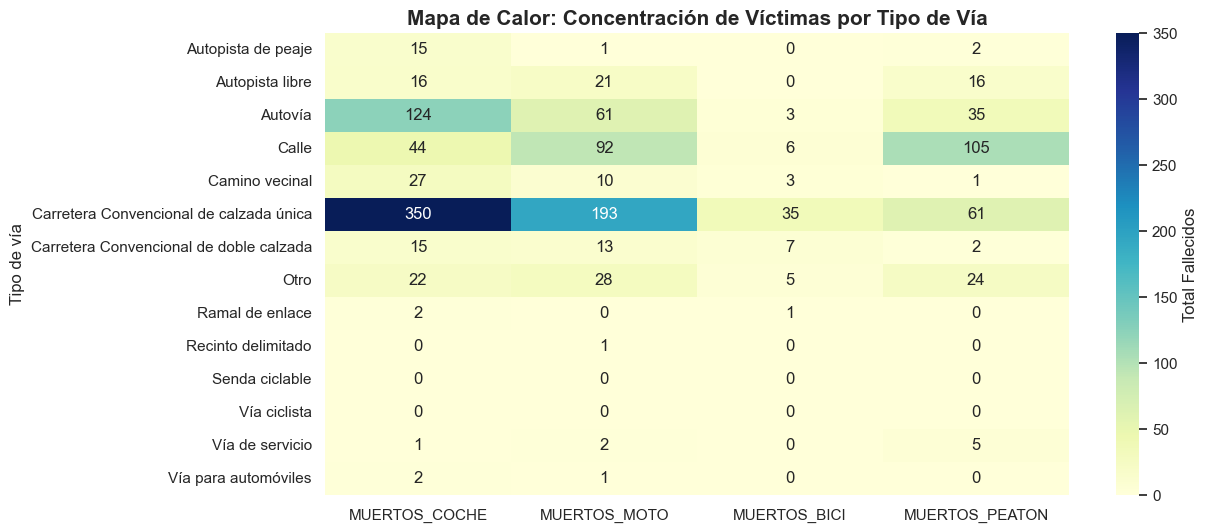

In [235]:
# Creamos una tabla cruzada de Usuario vs Factor (ej. Tipo de Vía)
# Esto te da una visión global rápida de todos
factores_global = df.groupby('TIPO_VIA_NOMBRE')[['MUERTOS_COCHE', 'MUERTOS_MOTO', 'MUERTOS_BICI', 'MUERTOS_PEATON']].sum()

plt.figure(figsize=(12, 6))
sns.heatmap(factores_global, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Total Fallecidos'})
plt.title('Mapa de Calor: Concentración de Víctimas por Tipo de Vía', fontsize=15, fontweight='bold')
plt.ylabel('Tipo de vía')
plt.show()

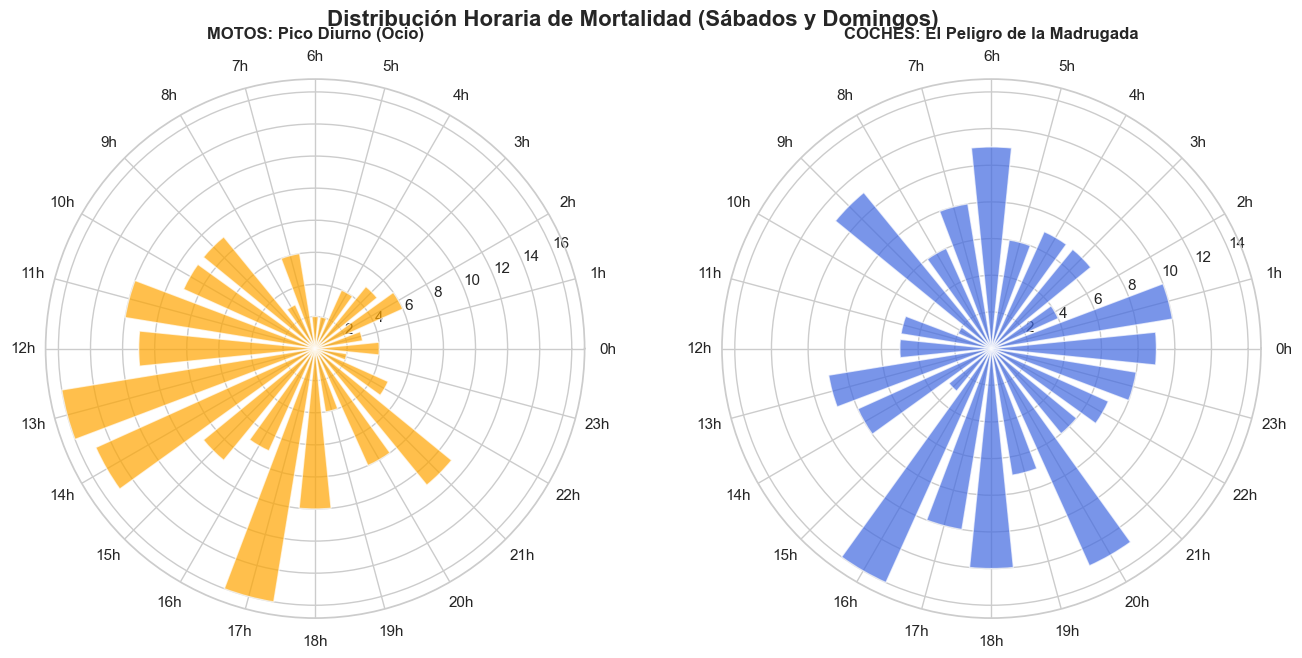

In [237]:

# 1. Filtramos datos de fin de semana para ambos
motos_fds = df[(df['MUERTOS_MOTO'] > 0) & (df['ES_FIN_DE_SEMANA'] == 1)]
coches_fds = df[(df['MUERTOS_COCHE'] > 0) & (df['ES_FIN_DE_SEMANA'] == 1)]

# 2. Función para preparar los datos del reloj
def preparar_reloj(data):
    counts = data['HORA'].value_counts().sort_index()
    # Aseguramos que todas las horas (0-23) estén presentes
    full_counts = np.zeros(24)
    for hr, count in counts.items():
        if 0 <= hr < 24: full_counts[int(hr)] = count
    return full_counts

horas_motos = preparar_reloj(motos_fds)
horas_coches = preparar_reloj(coches_fds)
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)

# 3. Gráfica Comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(16, 7))

# Gráfica Motos
ax1.bar(theta, horas_motos, width=0.2, color='orange', alpha=0.7)
ax1.set_xticks(theta)
ax1.set_xticklabels([f"{h}h" for h in range(24)])
ax1.set_title("MOTOS: Pico Diurno (Ocio)", va='bottom', fontweight='bold')

# Gráfica Coches
ax2.bar(theta, horas_coches, width=0.2, color='royalblue', alpha=0.7)
ax2.set_xticks(theta)
ax2.set_xticklabels([f"{h}h" for h in range(24)])
ax2.set_title("COCHES: El Peligro de la Madrugada", va='bottom', fontweight='bold')

plt.suptitle("Distribución Horaria de Mortalidad (Sábados y Domingos)", fontsize=16, fontweight='bold')
plt.show()

## 👤 4. El "Quién": La Vulnerabilidad sobre Ruedas

Tras entender el escenario y el momento, ponemos rostro a las cifras. Este bloque analiza cómo la mecánica del accidente cambia según el tipo de usuario, revelando que la responsabilidad del riesgo no se reparte por igual en la vía.

### 4.1. El Contraste de la Fragilidad: Volumen vs. Letalidad

El análisis masivo de usuarios revela una **paradoja crítica**: mientras que el **Turismo** concentra el mayor volumen de fallecidos debido a su alta presencia en el parque móvil, los **Motoristas** y **Ciclistas** presentan índices de letalidad que duplican la media nacional.

**Hallazgo:**  
Un accidente en el que se ve involucrada una moto tiene un **14% más de probabilidades de resultar en muerte** que uno de turismo bajo las mismas condiciones de vía y trazado.


### 4.2. Motos: El factor del "Auto-Riesgo" (Teoría 1)

El motorista es el único usuario que presenta un **perfil de siniestralidad solitaria dominante**, lo que redefine la causa del accidente.

**Mecánica del "Recto":**  
Casi el **50% de las muertes en moto** ocurren sin intervención de terceros (accidentes en solitario).

**Perfil técnico:**  
Estas muertes se concentran en **curvas de carreteras convencionales durante los domingos**. Aquí, el *"Quién"* es víctima de su propia técnica y de una gestión inadecuada de la velocidad en momentos de ocio.  
El motorista **no choca; se sale de la vía**.


### 4.3. Bicis y Usuarios Múltiples: La víctima de la interacción (Teoría 2)

A diferencia de la moto, el ciclista **rara vez fallece solo**. Su riesgo es casi exclusivamente externo.

**Mecánica de la Colisión:**  
El **75% de las muertes ciclistas** ocurren en accidentes múltiples, siendo el **alcance** y la **embestida lateral** los tipos predominantes.

**El Conflicto Normativo:**  
En estos casos, el *"Quién"* fallece por un **fallo en la convivencia vial**.  
El análisis de **Prioridad (STOP y Ceda el paso)** indica que el riesgo aumenta en **días laborables**, donde la distracción de los conductores de vehículos pesados y turismos en intersecciones se vuelve letal para el usuario vulnerable.

### 4.4. La Asimetría Horaria: Madrugada (Coche) vs. Mediodía (Moto)

El análisis de fallecidos en **fin de semana** revela que el riesgo no solo cambia por el **tipo de vehículo**, sino también por el **reloj biológico del conductor**:

**El Coche Nocturno:**  
Los **turismos doblan a las motos en fallecidos durante la madrugada (0h–6h)**, con **54 muertes**.  
El pico registrado a las **6:00 AM** sugiere que el riesgo del coche es de naturaleza **biológica y ambiental** (*fatiga, somnolencia y limitaciones de la visión nocturna*).

**La Moto Diurna:**  
Los **motoristas concentran su tragedia al mediodía (9h–14h)**, con **72 muertes**.  
En este caso, el riesgo es **dinámico y recreativo**, directamente vinculado al **pico de actividad en rutas de montaña**.



---
---


## 💡 5. El "Por Qué": Síntesis del Diagnóstico Final

El análisis integral de los datos (**Qué, Dónde, Cuándo y Quién**) permite concluir que la mortalidad vial **no es un evento aleatorio**, sino una **convergencia de factores predecibles**.

### 5.1. La Dualidad del Riesgo y el Factor Humano

Hemos identificado **dos perfiles antagónicos de fatalidad**:

**El Error Técnico y de Ocio:**  
Domina los **domingos al mediodía**. Afecta a **motoristas en solitario en curvas**.  
El *"por qué"* es la **incapacidad de gestionar la velocidad** en una **infraestructura exigente**.

**El Fallo de Convivencia y la Fatiga:**  
Domina la **madrugada (coches)** y los **días laborables** en situaciones de **interacción múltiple**.  
El *"por qué"* reside en la **pérdida de atención**, ya sea por el **cansancio extremo del conductor de turismo al amanecer** o por el **incumplimiento de prioridades** en el tráfico diario.

---

### 5.2. Conclusión General del Proyecto

La letalidad es el resultado de un **"Punto de Quiebre"**, donde la **infraestructura no perdona el error**.  
Los datos demuestran que **se muere de forma distinta según lo que se conduce**: el **coche** es víctima del **cansancio y la noche**; la **moto y la bici**, de la **técnica propia** y de la **invisibilidad frente a terceros**.
